# Exploratory Data Analysis
In this notebook, we will try and understand our data by looking at descriptive statistics, performing univariate, and bivarivate analysis.

In [10]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', None)


In [11]:
# Reading the dataset

data = pd.read_csv('data/Energy_LineApril2022to2024.csv')

# Correcting the data types

data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])
data['ut'] = data['ut'].astype("object")
data['current_station_code'] = data['current_station_code'].astype("object")
data['next_station_code'] = data['next_station_code'].astype("object")
data['track'] = data['track'].astype("object")
data['in_service'] = data['in_service'].astype("object")
data['si_siv_nservice'] = data['si_siv_nservice'].astype("object")
data['si_siv_ndriver'] = data['si_siv_ndriver'].astype("object")

In [12]:
# Basic look at our dataset
data.head()

,ut,start_date,end_date,current_station,next_station,current_station_code,next_station_code,client_line,track,tiempo_marcha,tiempo_parada,in_service,si_siv_nservice,si_siv_ndriver,si_siv_ndriver_def,si_siv_ndriver_category,avg_voltage,kilometres,net_energy_consumed_by_UT,auxiliary_energy_consumed,traction_energy,rheostatic_energy,regenerated_traction_energy,catenary_regenerated_energy,regenerated_energy_to_auxiliaries,net_energy_consumed_by_UT_weight,auxiliary_energy_consumed_weight,traction_energy_weight,rheostatic_energy_weight,regenerated_traction_energy_weight,catenary_regenerated_energy_weight,regenerated_energy_to_auxiliaries_weight
0,927,2023-01-01 01:01:41+00:00,2023-01-01 01:03:05+00:00,Uribarri,Casco Viejo,216,215,L3 Txori,2,120.0,0.0,1,9801,3321,3321,Tren,1771.061176,0.89,3.616469,0.883051,3.516268,-3.588674,0.782850,-0.442717,-0.340133,2.958499,0.722391,2.876528,-2.935760,0.640420,-0.362170,-0.278250
1,927,2023-01-01 01:05:37+00:00,2023-01-01 01:07:03+00:00,Zurbaranbarri,Txurdinaga,214,213,Bilbao-Donostia,1,120.0,0.0,1,9801,3321,3321,Tren,1747.360345,1.03,13.792816,1.057803,12.981937,-5.276301,0.246923,0.000000,-0.246923,11.244754,0.862385,10.583676,-4.301566,0.201307,0.000000,-0.201307
2,927,2023-01-01 01:13:33+00:00,2023-01-01 01:15:19+00:00,Kukullaga,Otxarkoaga,211,212,Bilbao-Donostia,2,120.0,0.0,1,9800,3321,3321,Tren,1755.182009,1.40,22.328577,1.116167,21.558367,-1.818634,0.345957,-0.096617,-0.249340,18.333651,0.916466,17.701245,-1.493254,0.284060,-0.079331,-0.204730
3,927,2023-01-01 01:15:50+00:00,2023-01-01 01:16:55+00:00,Otxarkoaga,Txurdinaga,212,213,Bilbao-Donostia,2,60.0,0.0,1,9800,3321,3321,Tren,1780.542424,0.69,6.190618,0.784548,5.808992,-6.779621,0.402922,-0.077522,-0.325400,4.905837,0.621729,4.603407,-5.372550,0.319298,-0.061433,-0.257865
4,927,2023-01-01 01:23:19+00:00,2023-01-01 10:49:22+00:00,Uribarri,Matiko,216,217,L3 Txori,1,60.0,0.0,1,9800,3321,3321,Tren,1733.938077,1.10,3.536176,0.305927,3.230249,0.000000,0.000000,0.000000,0.000000,2.874232,0.248881,2.625351,0.000000,0.000000,0.000000,0.000000


In [13]:
# Columns in our dataset
data.columns

Index(['ut', 'start_date', 'end_date', 'current_station', 'next_station',
       'current_station_code', 'next_station_code', 'client_line', 'track',
       'tiempo_marcha', 'tiempo_parada', 'in_service', 'si_siv_nservice',
       'si_siv_ndriver', 'si_siv_ndriver_def', 'si_siv_ndriver_category',
       'avg_voltage', 'kilometres', 'net_energy_consumed_by_UT',
       'auxiliary_energy_consumed', 'traction_energy', 'rheostatic_energy',
       'regenerated_traction_energy', 'catenary_regenerated_energy',
       'regenerated_energy_to_auxiliaries', 'net_energy_consumed_by_UT_weight',
       'auxiliary_energy_consumed_weight', 'traction_energy_weight',
       'rheostatic_energy_weight', 'regenerated_traction_energy_weight',
       'catenary_regenerated_energy_weight',
       'regenerated_energy_to_auxiliaries_weight'],
      dtype='object')

### Descriptive Statistics

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,tiempo_marcha,tiempo_parada,avg_voltage,kilometres,net_energy_consumed_by_UT,auxiliary_energy_consumed,traction_energy,rheostatic_energy,regenerated_traction_energy,catenary_regenerated_energy,regenerated_energy_to_auxiliaries,net_energy_consumed_by_UT_weight,auxiliary_energy_consumed_weight,traction_energy_weight,rheostatic_energy_weight,regenerated_traction_energy_weight,catenary_regenerated_energy_weight,regenerated_energy_to_auxiliaries_weight
count,"3,160,875.00","3,160,875.00","3,161,809.00","3,133,792.00","3,162,164.00","3,162,164.00","3,162,164.00","3,162,001.00","3,162,164.00","3,162,164.00","3,162,164.00","3,162,164.00","3,162,164.00","3,162,164.00","3,162,001.00","3,162,164.00","3,162,164.00","3,162,164.00"
mean,167.56,23.47,"1,728.56",1.86,9.51,1.59,11.25,-2.11,3.33,-2.87,-0.46,7.76,1.29,9.17,-1.72,2.71,-2.34,-0.37
std,113.38,43.97,37.33,1.54,9.14,1.53,8.69,2.24,2.78,2.51,0.46,7.46,1.25,7.09,1.83,2.27,2.04,0.37
min,60.00,0.00,0.00,0.01,-16.29,0.00,0.00,-29.15,0.00,-84.97,-18.85,-13.65,0.00,0.00,-23.73,0.00,-70.77,-15.81
25%,110.00,0.00,"1,710.59",0.90,3.34,0.73,5.31,-3.01,1.32,-4.16,-0.57,2.74,0.60,4.34,-2.45,1.08,-3.39,-0.46
50%,120.00,10.00,"1,730.02",1.39,7.35,1.16,9.37,-1.42,2.67,-2.26,-0.34,6.00,0.94,7.66,-1.16,2.18,-1.84,-0.28
75%,180.00,20.00,"1,748.63",1.94,13.14,1.83,14.46,-0.53,4.73,-1.00,-0.19,10.71,1.49,11.75,-0.43,3.85,-0.82,-0.16
max,"1,440.00",240.00,"1,901.82",9.99,190.13,155.48,241.14,0.00,98.50,0.00,0.00,158.35,129.01,200.84,0.00,82.03,0.00,0.00


In [15]:
# Info about our dataset
pd.reset_option('display.float_format')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162164 entries, 0 to 3162163
Data columns (total 32 columns):
 #   Column                                    Dtype              
---  ------                                    -----              
 0   ut                                        object             
 1   start_date                                datetime64[ns, UTC]
 2   end_date                                  datetime64[ns, UTC]
 3   current_station                           object             
 4   next_station                              object             
 5   current_station_code                      object             
 6   next_station_code                         object             
 7   client_line                               object             
 8   track                                     object             
 9   tiempo_marcha                             float64            
 10  tiempo_parada                             float64            
 11  in_service 

### Correlation Matrix

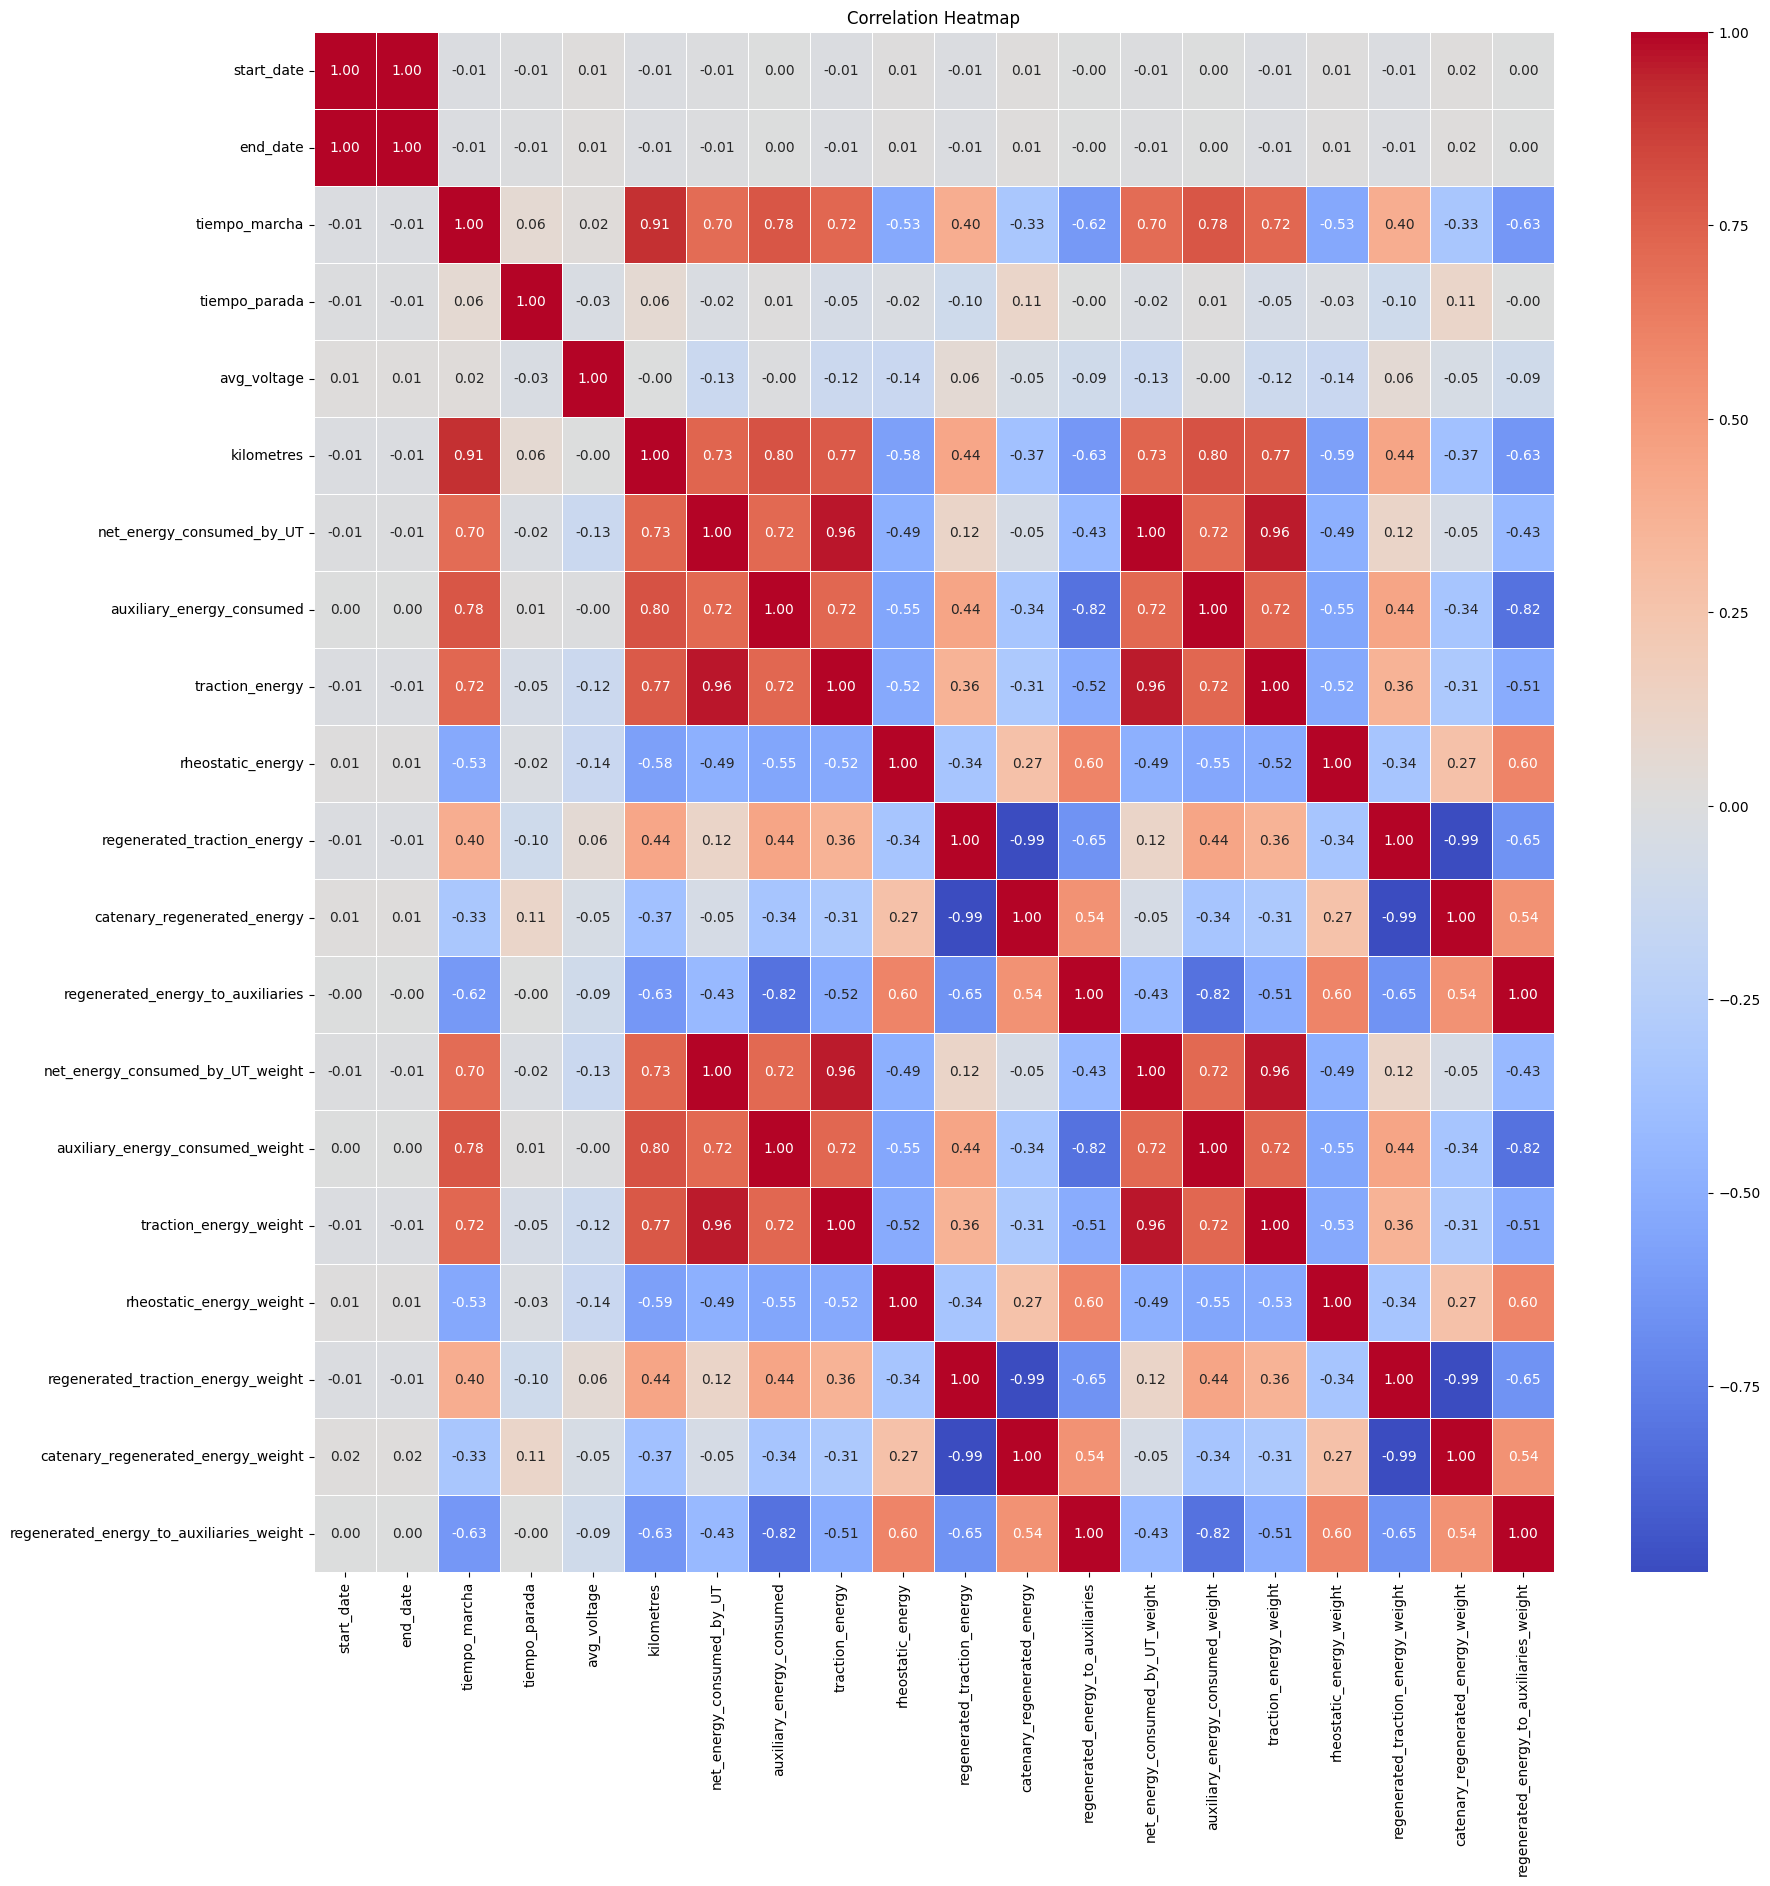

In [16]:
# Calculate Correlation Matrix
corr_matrix = data.select_dtypes(exclude=['object']).corr()

# Plot Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Univariate Analysis

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28069/2846249393.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28069/2846249393.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28069/2846249393.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28069/2846249393.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

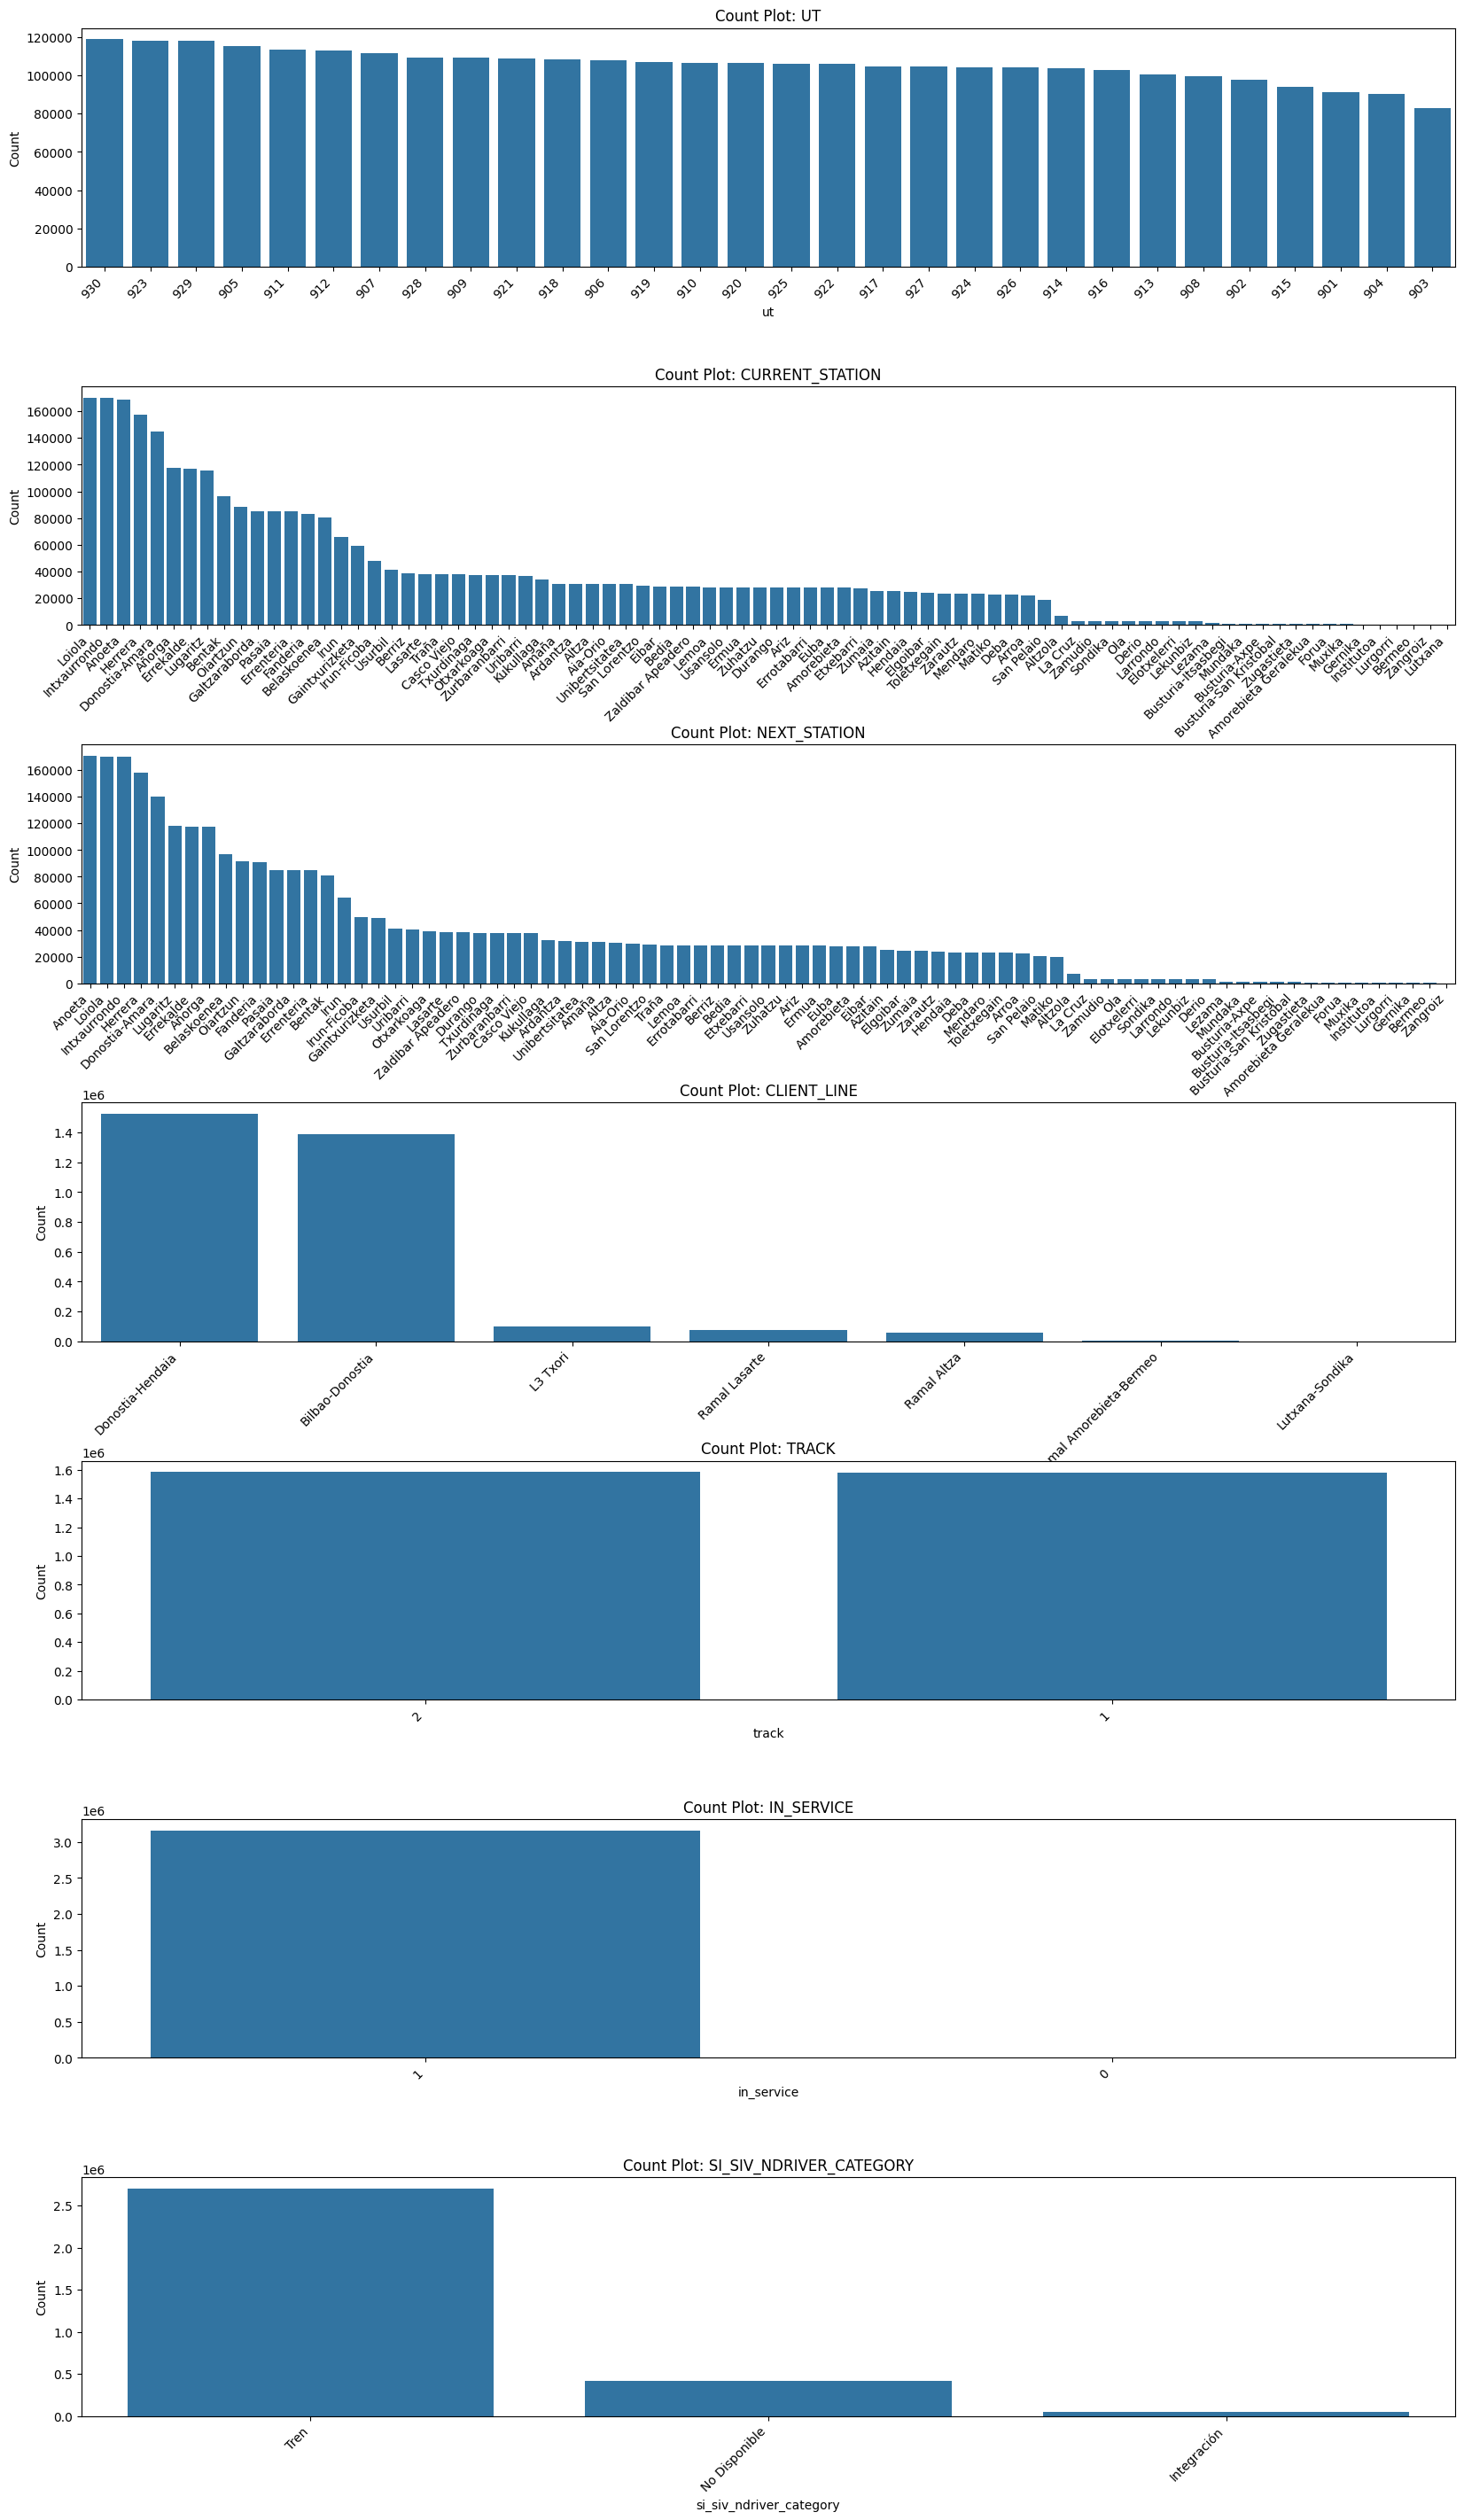

In [17]:
# List of categorical columns
col_list = ['ut', 'current_station', 'next_station', 'client_line', 'track',  'in_service', 'si_siv_ndriver_category']

# Checking the distributions using count plots
fig, axes = plt.subplots(len(col_list), 1, figsize=(20, len(col_list) * 5))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(col_list, axes):
    sns.countplot(x=col, data=data, ax=ax, order=data[col].value_counts().index)
    ax.set_title('Count Plot: ' + col.upper())
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [18]:
# Creating a list of columns to visualize

col_list1 =['tiempo_marcha', 'tiempo_parada', 'avg_voltage', 'kilometres']

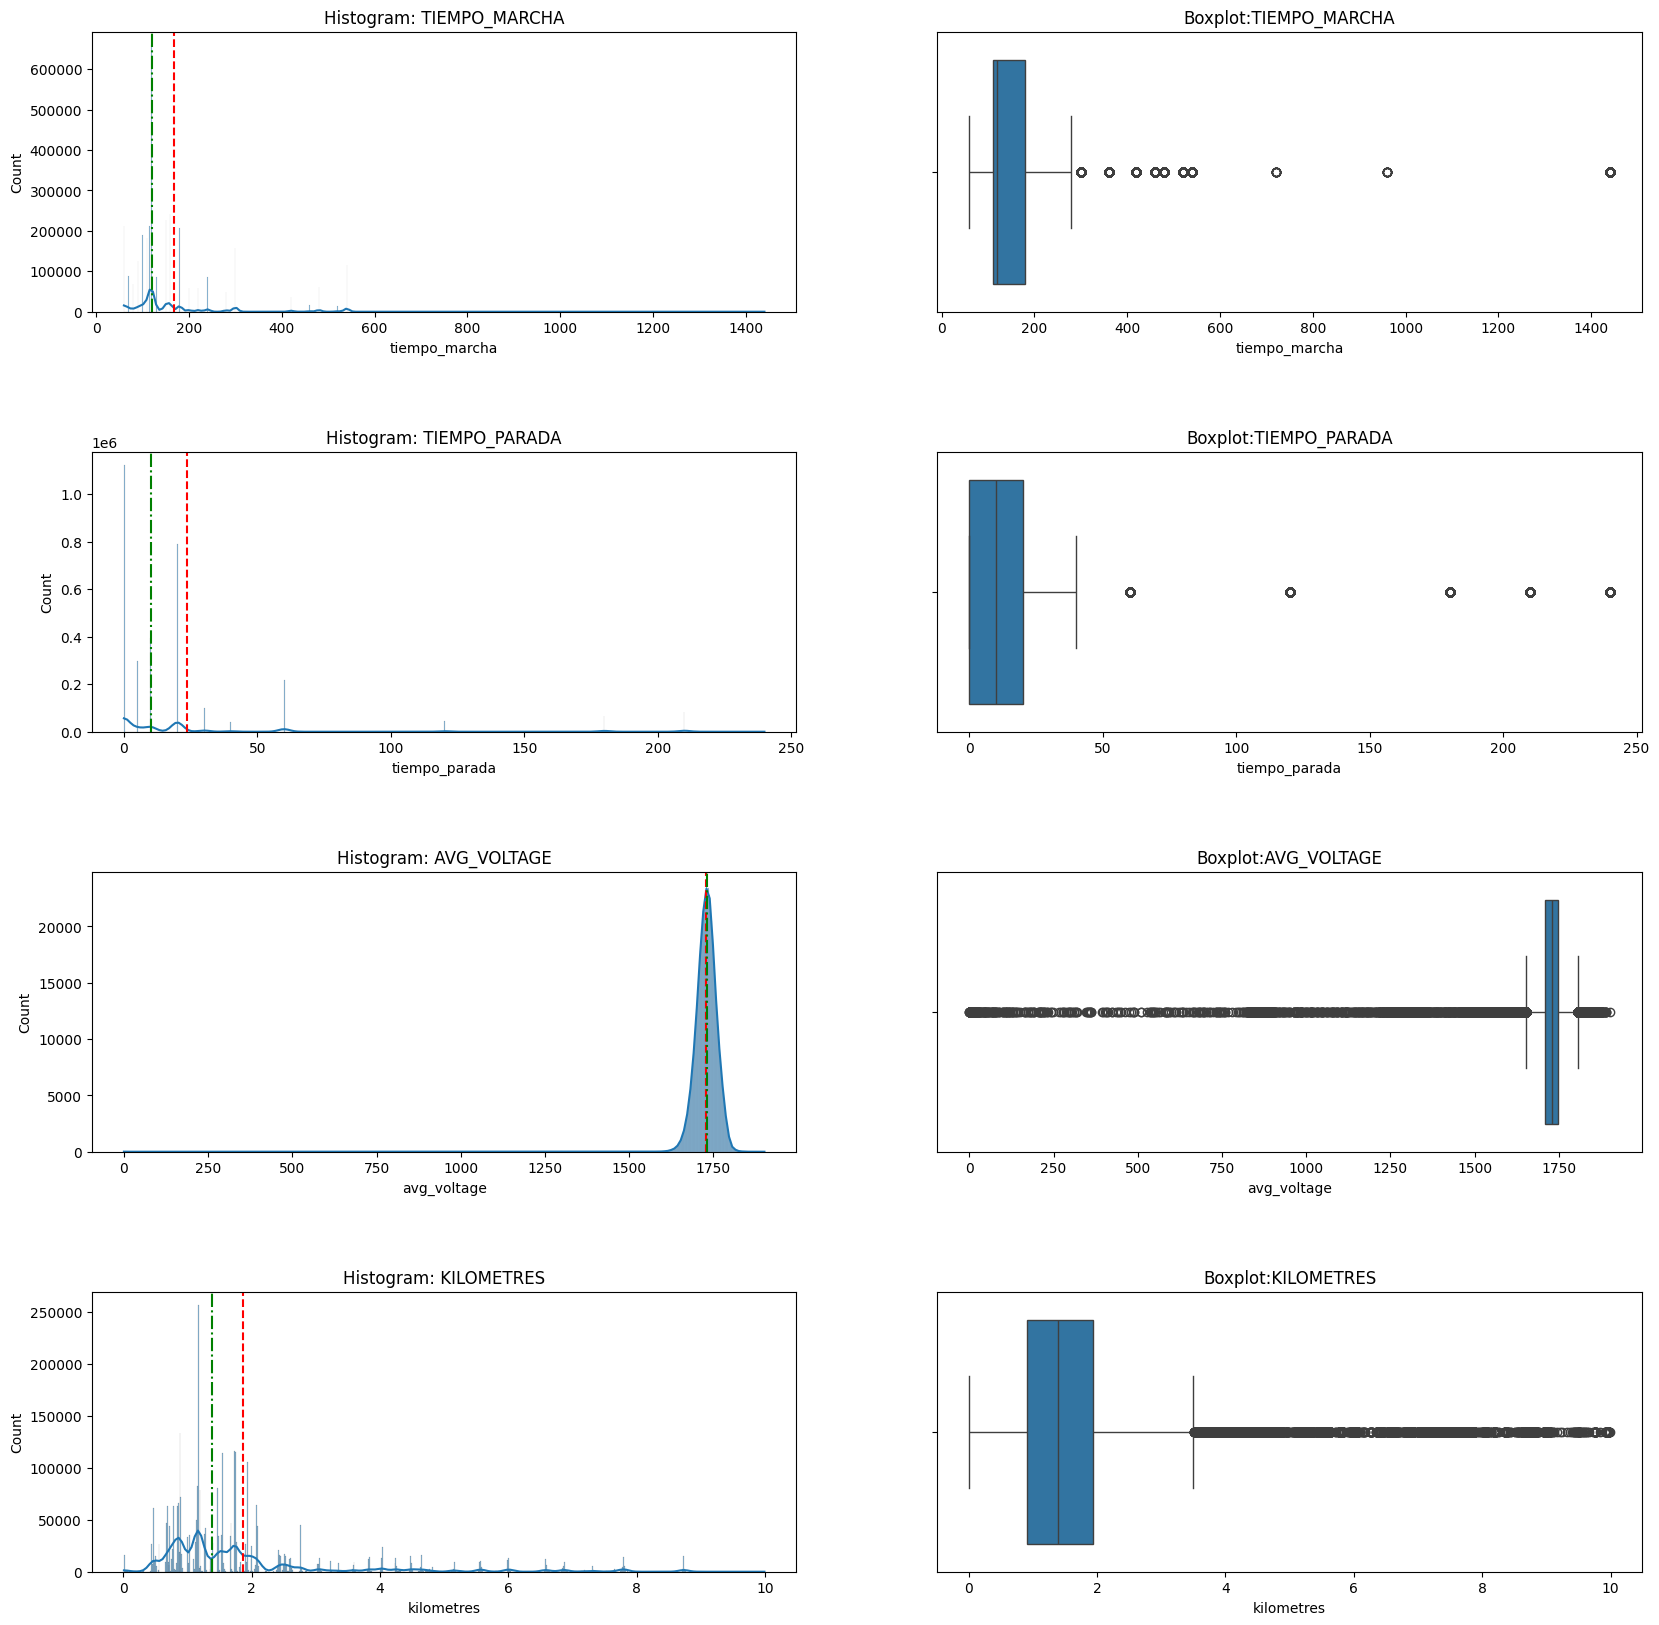

In [19]:
# Checking the distributions

fig,axes = plt.subplots(4,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(col_list1,axes):
    sns.histplot(x=i,data = data,ax=j[0],kde=True)
    j[0].axvline(x = data[i].mean(),linestyle = '--',color = 'red')
    j[0].axvline(x = data[i].median(),linestyle = '-.',color = 'green')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = data,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())

In [20]:
# Creating a list of columns to visualize

col_list2 = ['net_energy_consumed_by_UT',
       'auxiliary_energy_consumed', 'traction_energy', 'rheostatic_energy',
       'regenerated_traction_energy', 'catenary_regenerated_energy',
       'regenerated_energy_to_auxiliaries']

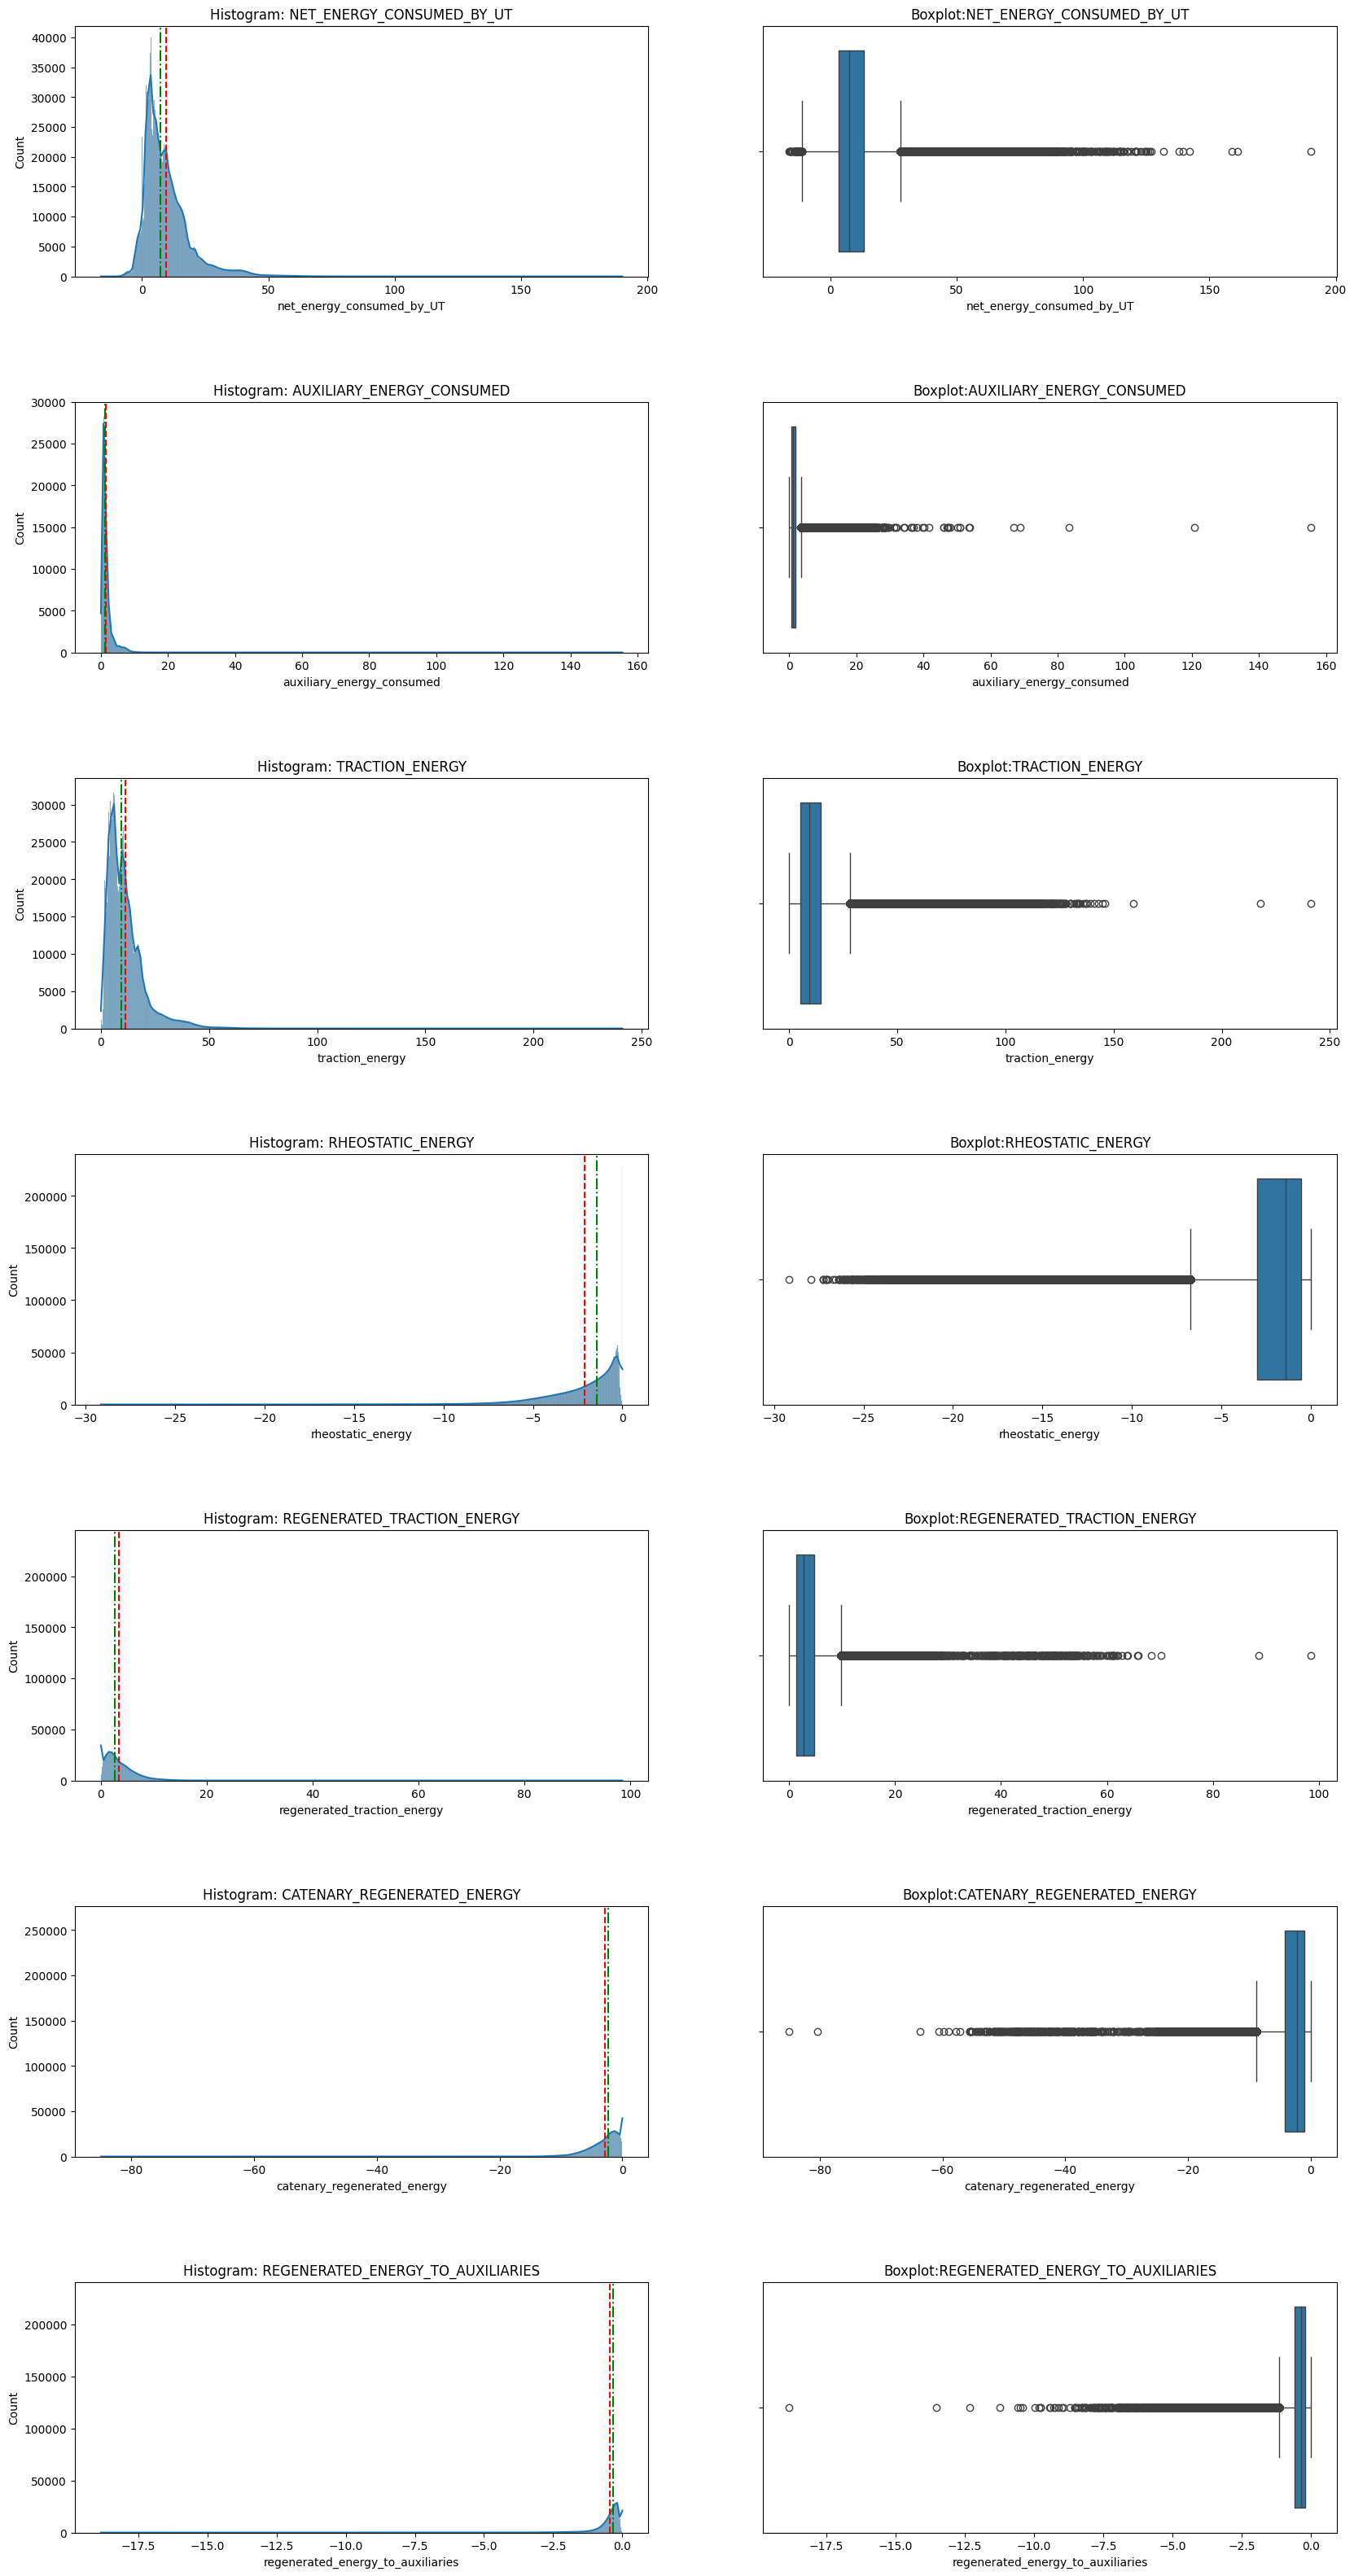

In [21]:
# Checking the distributions

fig,axes = plt.subplots(7,2,figsize=(20,40))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(col_list2,axes):
    sns.histplot(x=i,data = data,ax=j[0],kde=True)
    j[0].axvline(x = data[i].mean(),linestyle = '--',color = 'red')
    j[0].axvline(x = data[i].median(),linestyle = '-.',color = 'green')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = data,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())

In [22]:
# Creating a list of columns to visualize

col_list3 = ['net_energy_consumed_by_UT_weight',
       'auxiliary_energy_consumed_weight', 'traction_energy_weight',
       'rheostatic_energy_weight', 'regenerated_traction_energy_weight',
       'catenary_regenerated_energy_weight',
       'regenerated_energy_to_auxiliaries_weight']

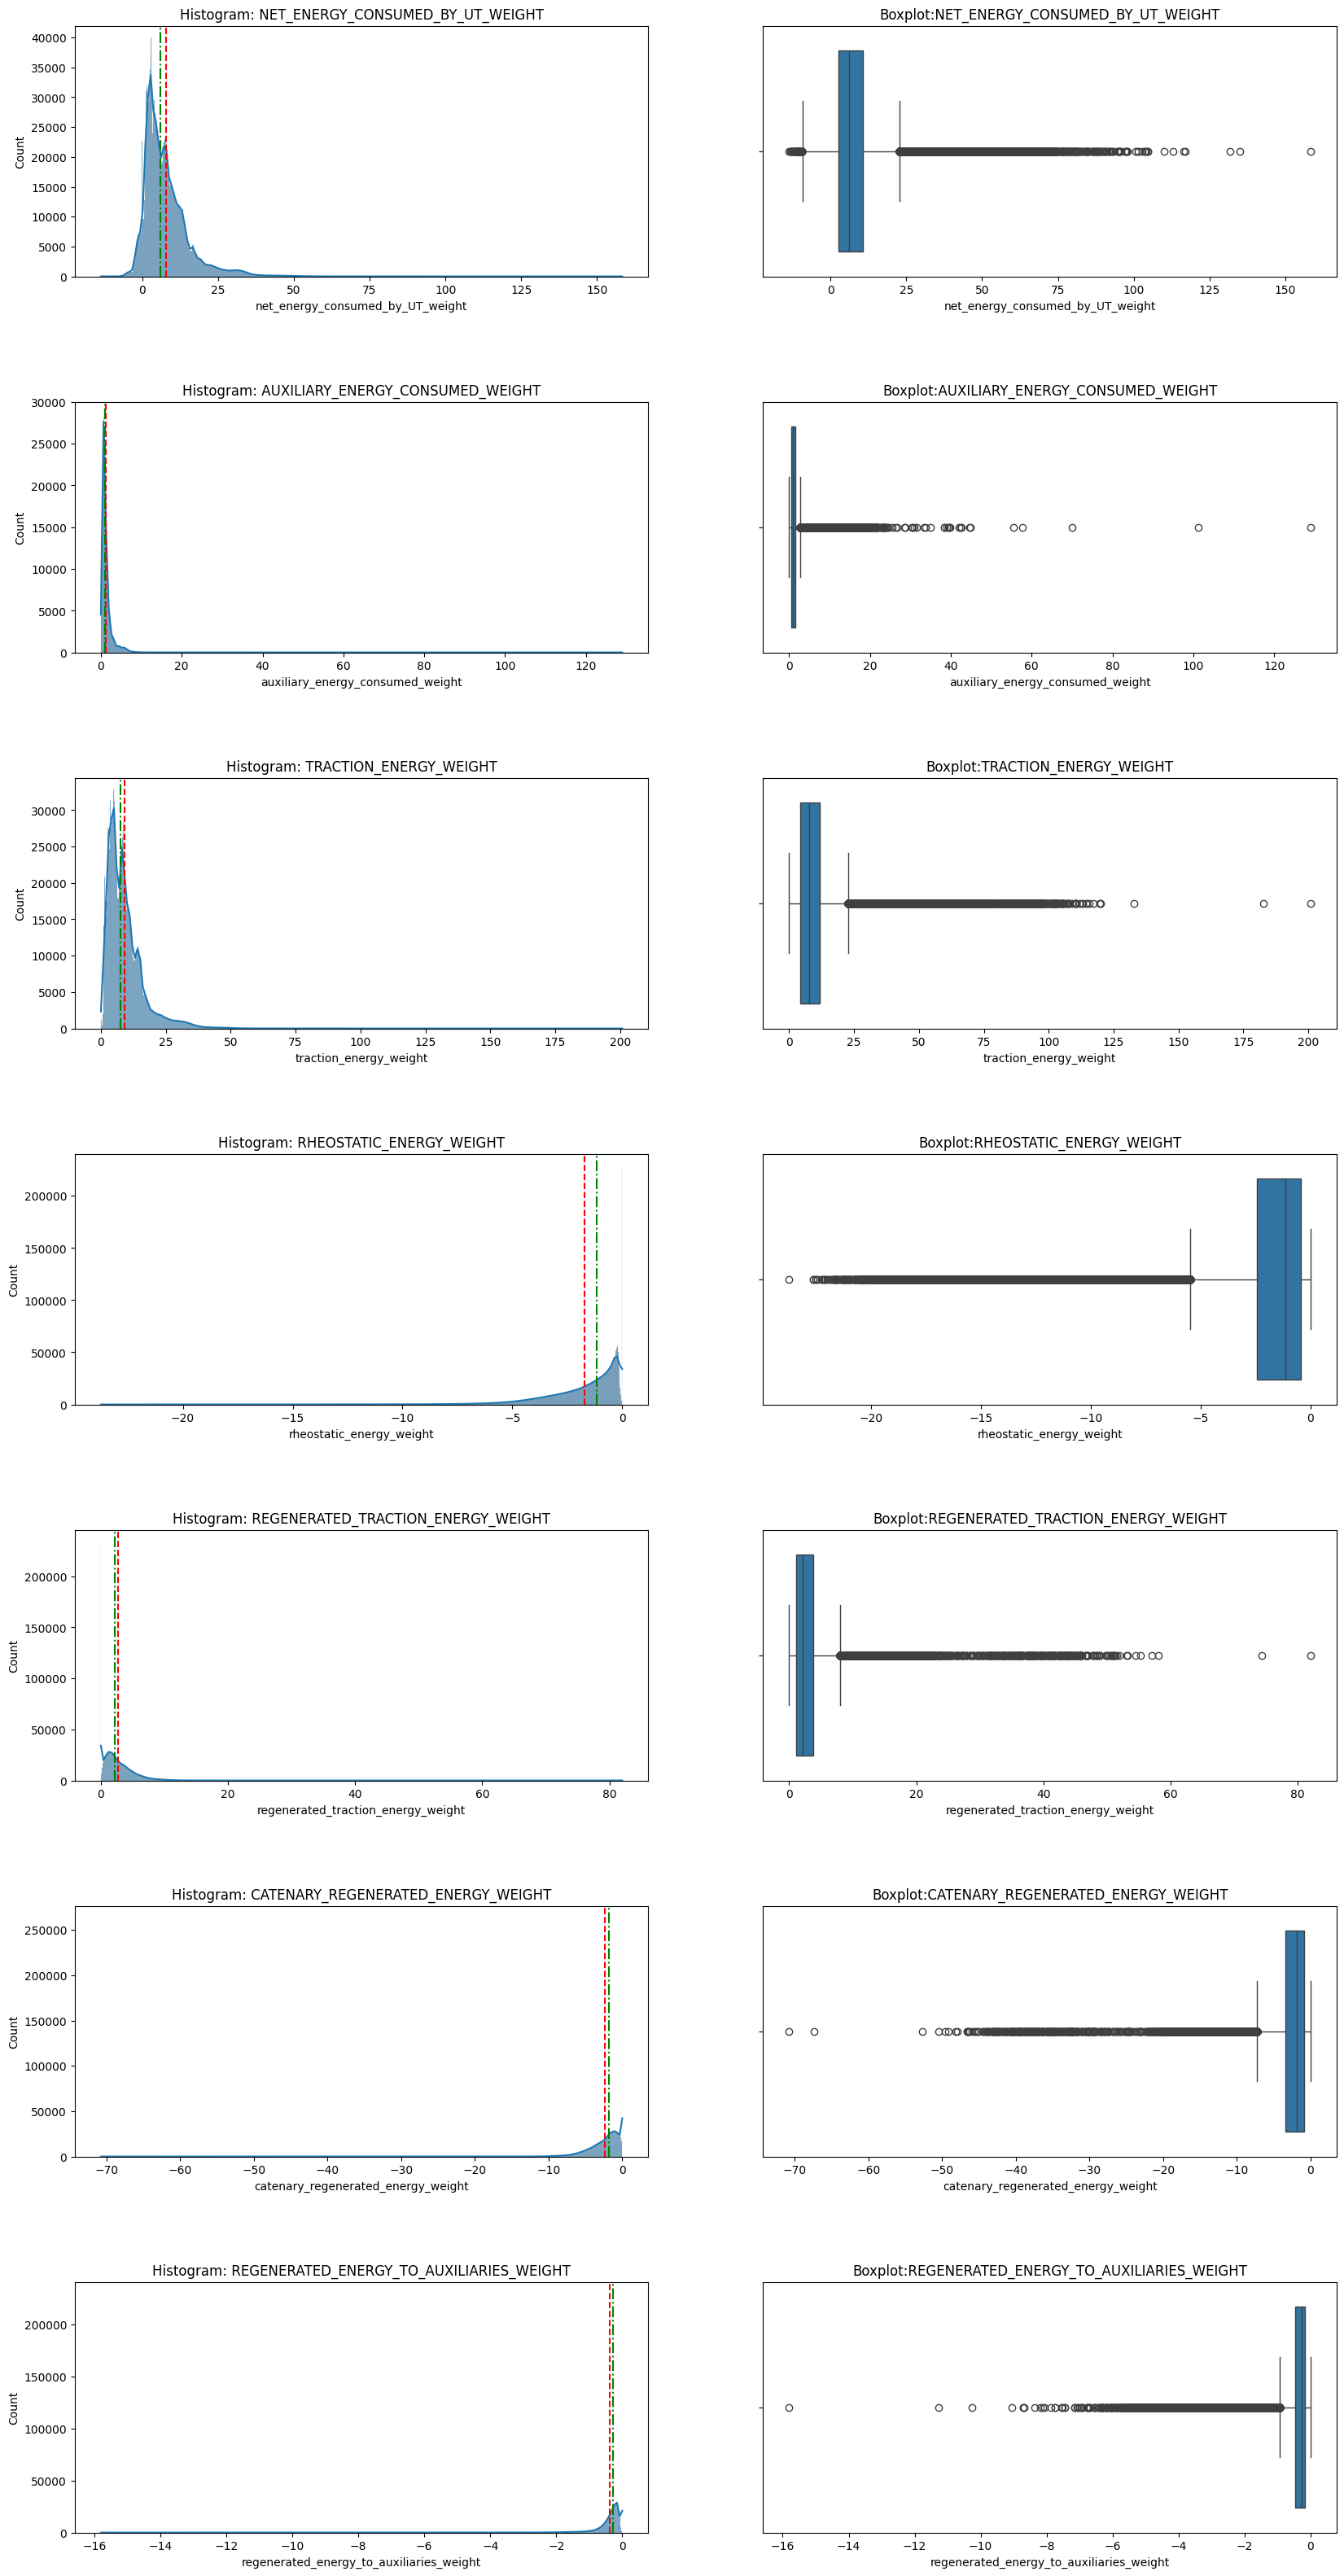

In [23]:
# Checking the distributions

fig,axes = plt.subplots(7,2,figsize=(20,40))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
for i,j in zip(col_list3,axes):
    sns.histplot(x=i,data = data,ax=j[0],kde=True)
    j[0].axvline(x = data[i].mean(),linestyle = '--',color = 'red')
    j[0].axvline(x = data[i].median(),linestyle = '-.',color = 'green')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = data,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())

### Bivariate Analysis

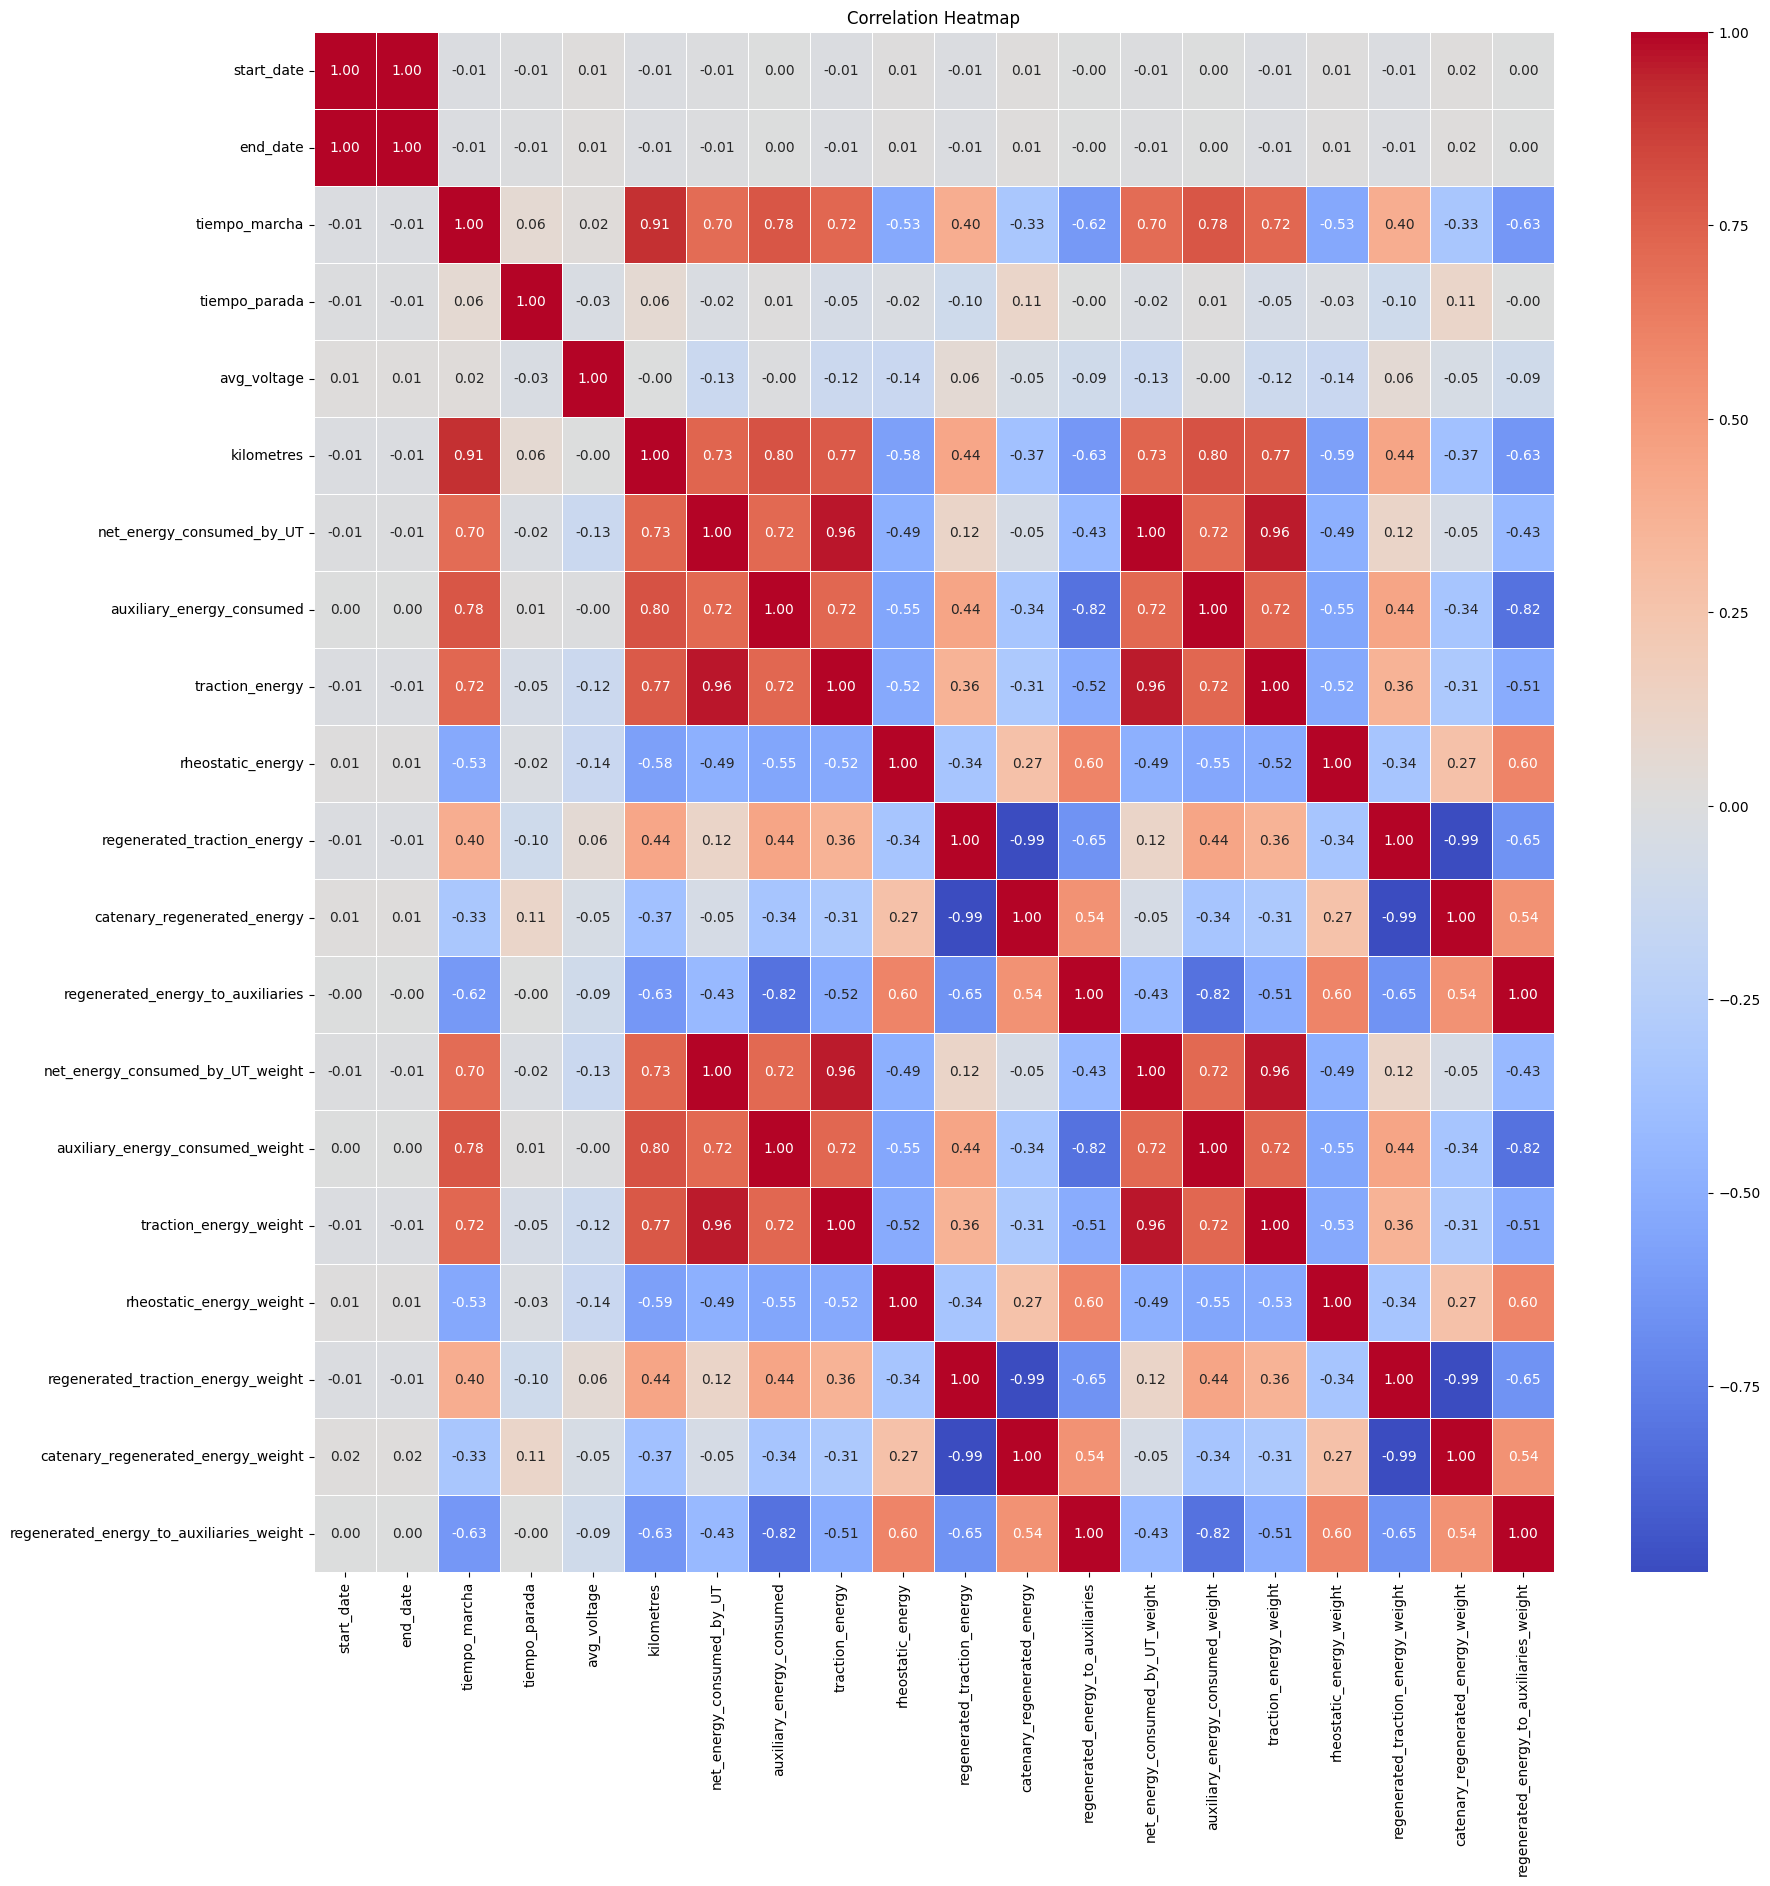

In [24]:
# Calculate Correlation Matrix
corr_matrix = data.select_dtypes(exclude=['object']).corr()

# Plot Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

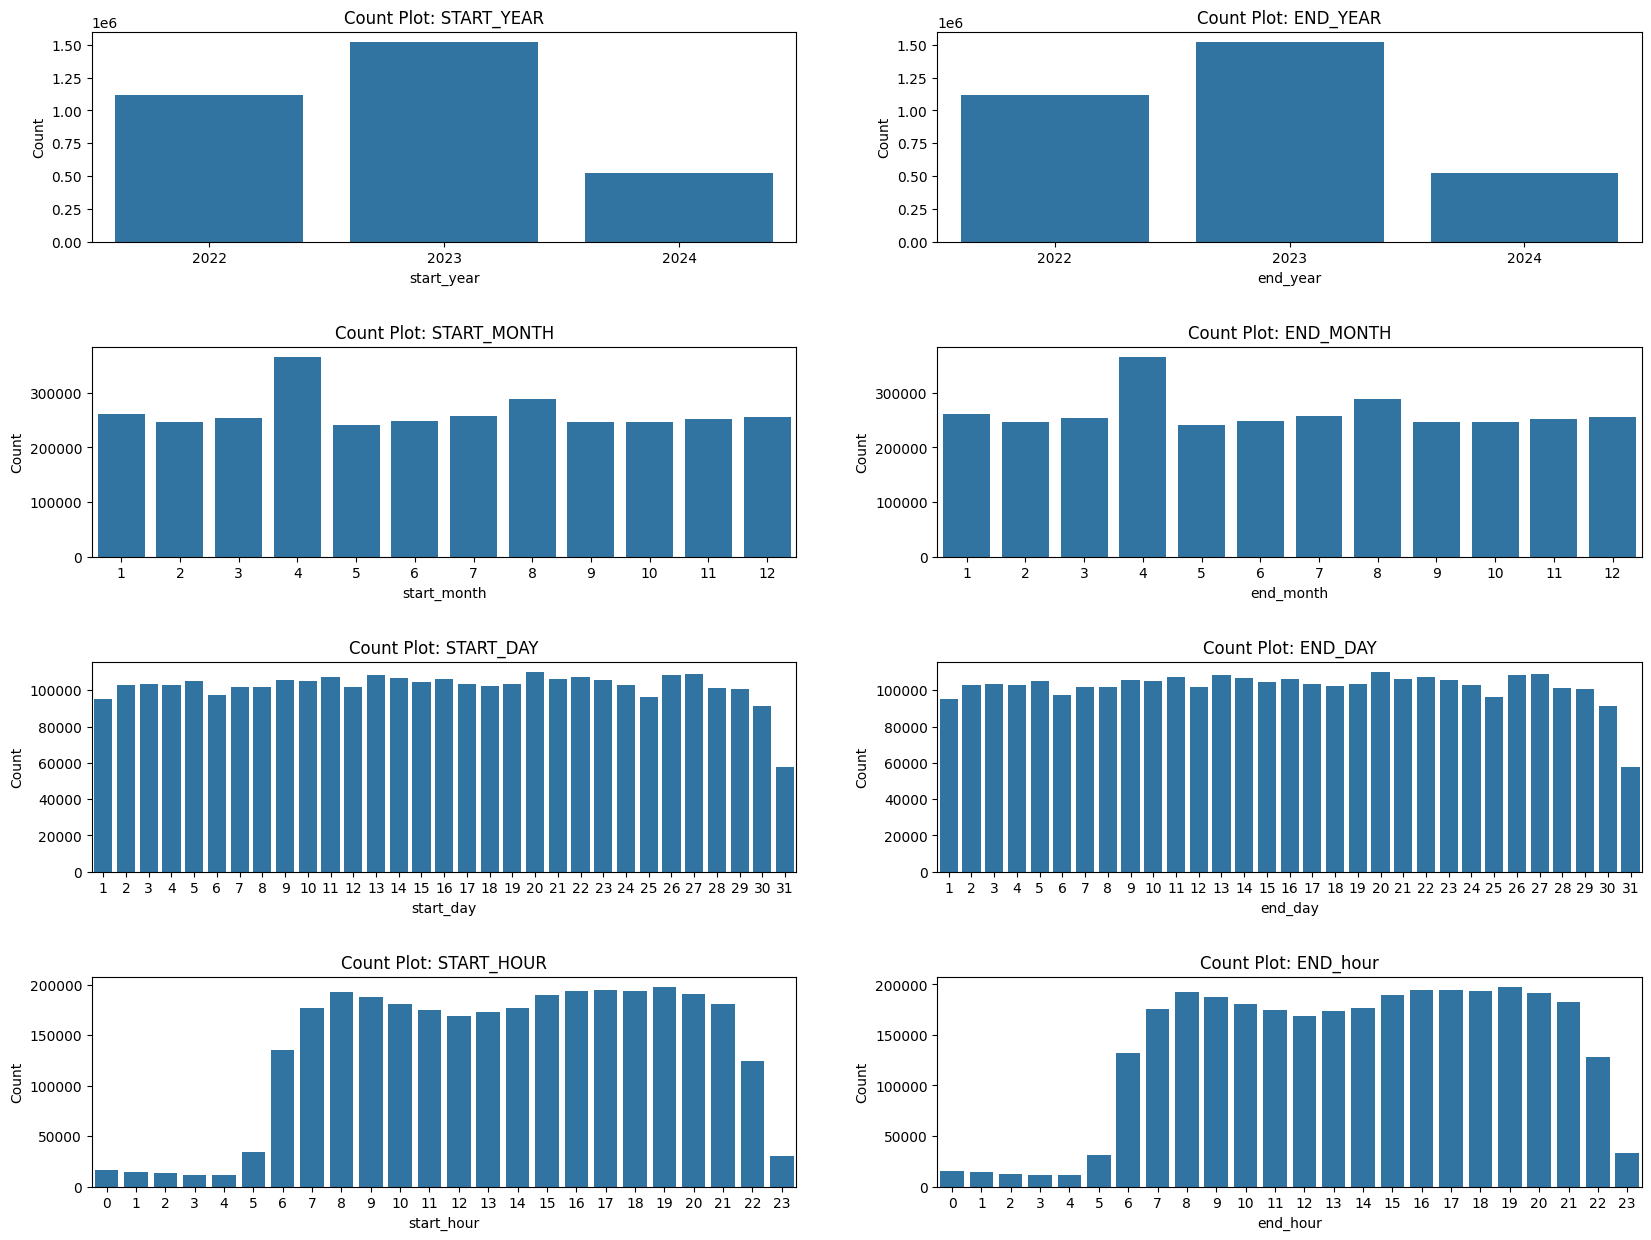

In [25]:
# Extracting year, month, and day from the datetime columns
data['start_year'] = data['start_date'].dt.year
data['start_month'] = data['start_date'].dt.month
data['start_day'] = data['start_date'].dt.day
data['start_hour'] = data['start_date'].dt.hour

data['end_year'] = data['end_date'].dt.year
data['end_month'] = data['end_date'].dt.month
data['end_day'] = data['end_date'].dt.day
data['end_hour'] = data['end_date'].dt.hour

# Creating count plots for the extracted parts
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# Count plot for start_year
sns.countplot(x='start_year', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Count Plot: START_YEAR')
axes[0, 0].set_xlabel('start_year')
axes[0, 0].set_ylabel('Count')

# Count plot for start_month
sns.countplot(x='start_month', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Count Plot: START_MONTH')
axes[1, 0].set_xlabel('start_month')
axes[1, 0].set_ylabel('Count')

# Count plot for start_day
sns.countplot(x='start_day', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Count Plot: START_DAY')
axes[2, 0].set_xlabel('start_day')
axes[2, 0].set_ylabel('Count')

# Count plot for start_hour
sns.countplot(x='start_hour', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Count Plot: START_HOUR')
axes[3, 0].set_xlabel('start_hour')
axes[3, 0].set_ylabel('Count')

# Count plot for end_year
sns.countplot(x='end_year', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Count Plot: END_YEAR')
axes[0, 1].set_xlabel('end_year')
axes[0, 1].set_ylabel('Count')

# Count plot for end_month
sns.countplot(x='end_month', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot: END_MONTH')
axes[1, 1].set_xlabel('end_month')
axes[1, 1].set_ylabel('Count')

# Count plot for end_day
sns.countplot(x='end_day', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot: END_DAY')
axes[2, 1].set_xlabel('end_day')
axes[2, 1].set_ylabel('Count')

# Count plot for end_hour
sns.countplot(x='end_hour', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Count Plot: END_hour')
axes[3, 1].set_xlabel('end_hour')
axes[3, 1].set_ylabel('Count')

plt.show()

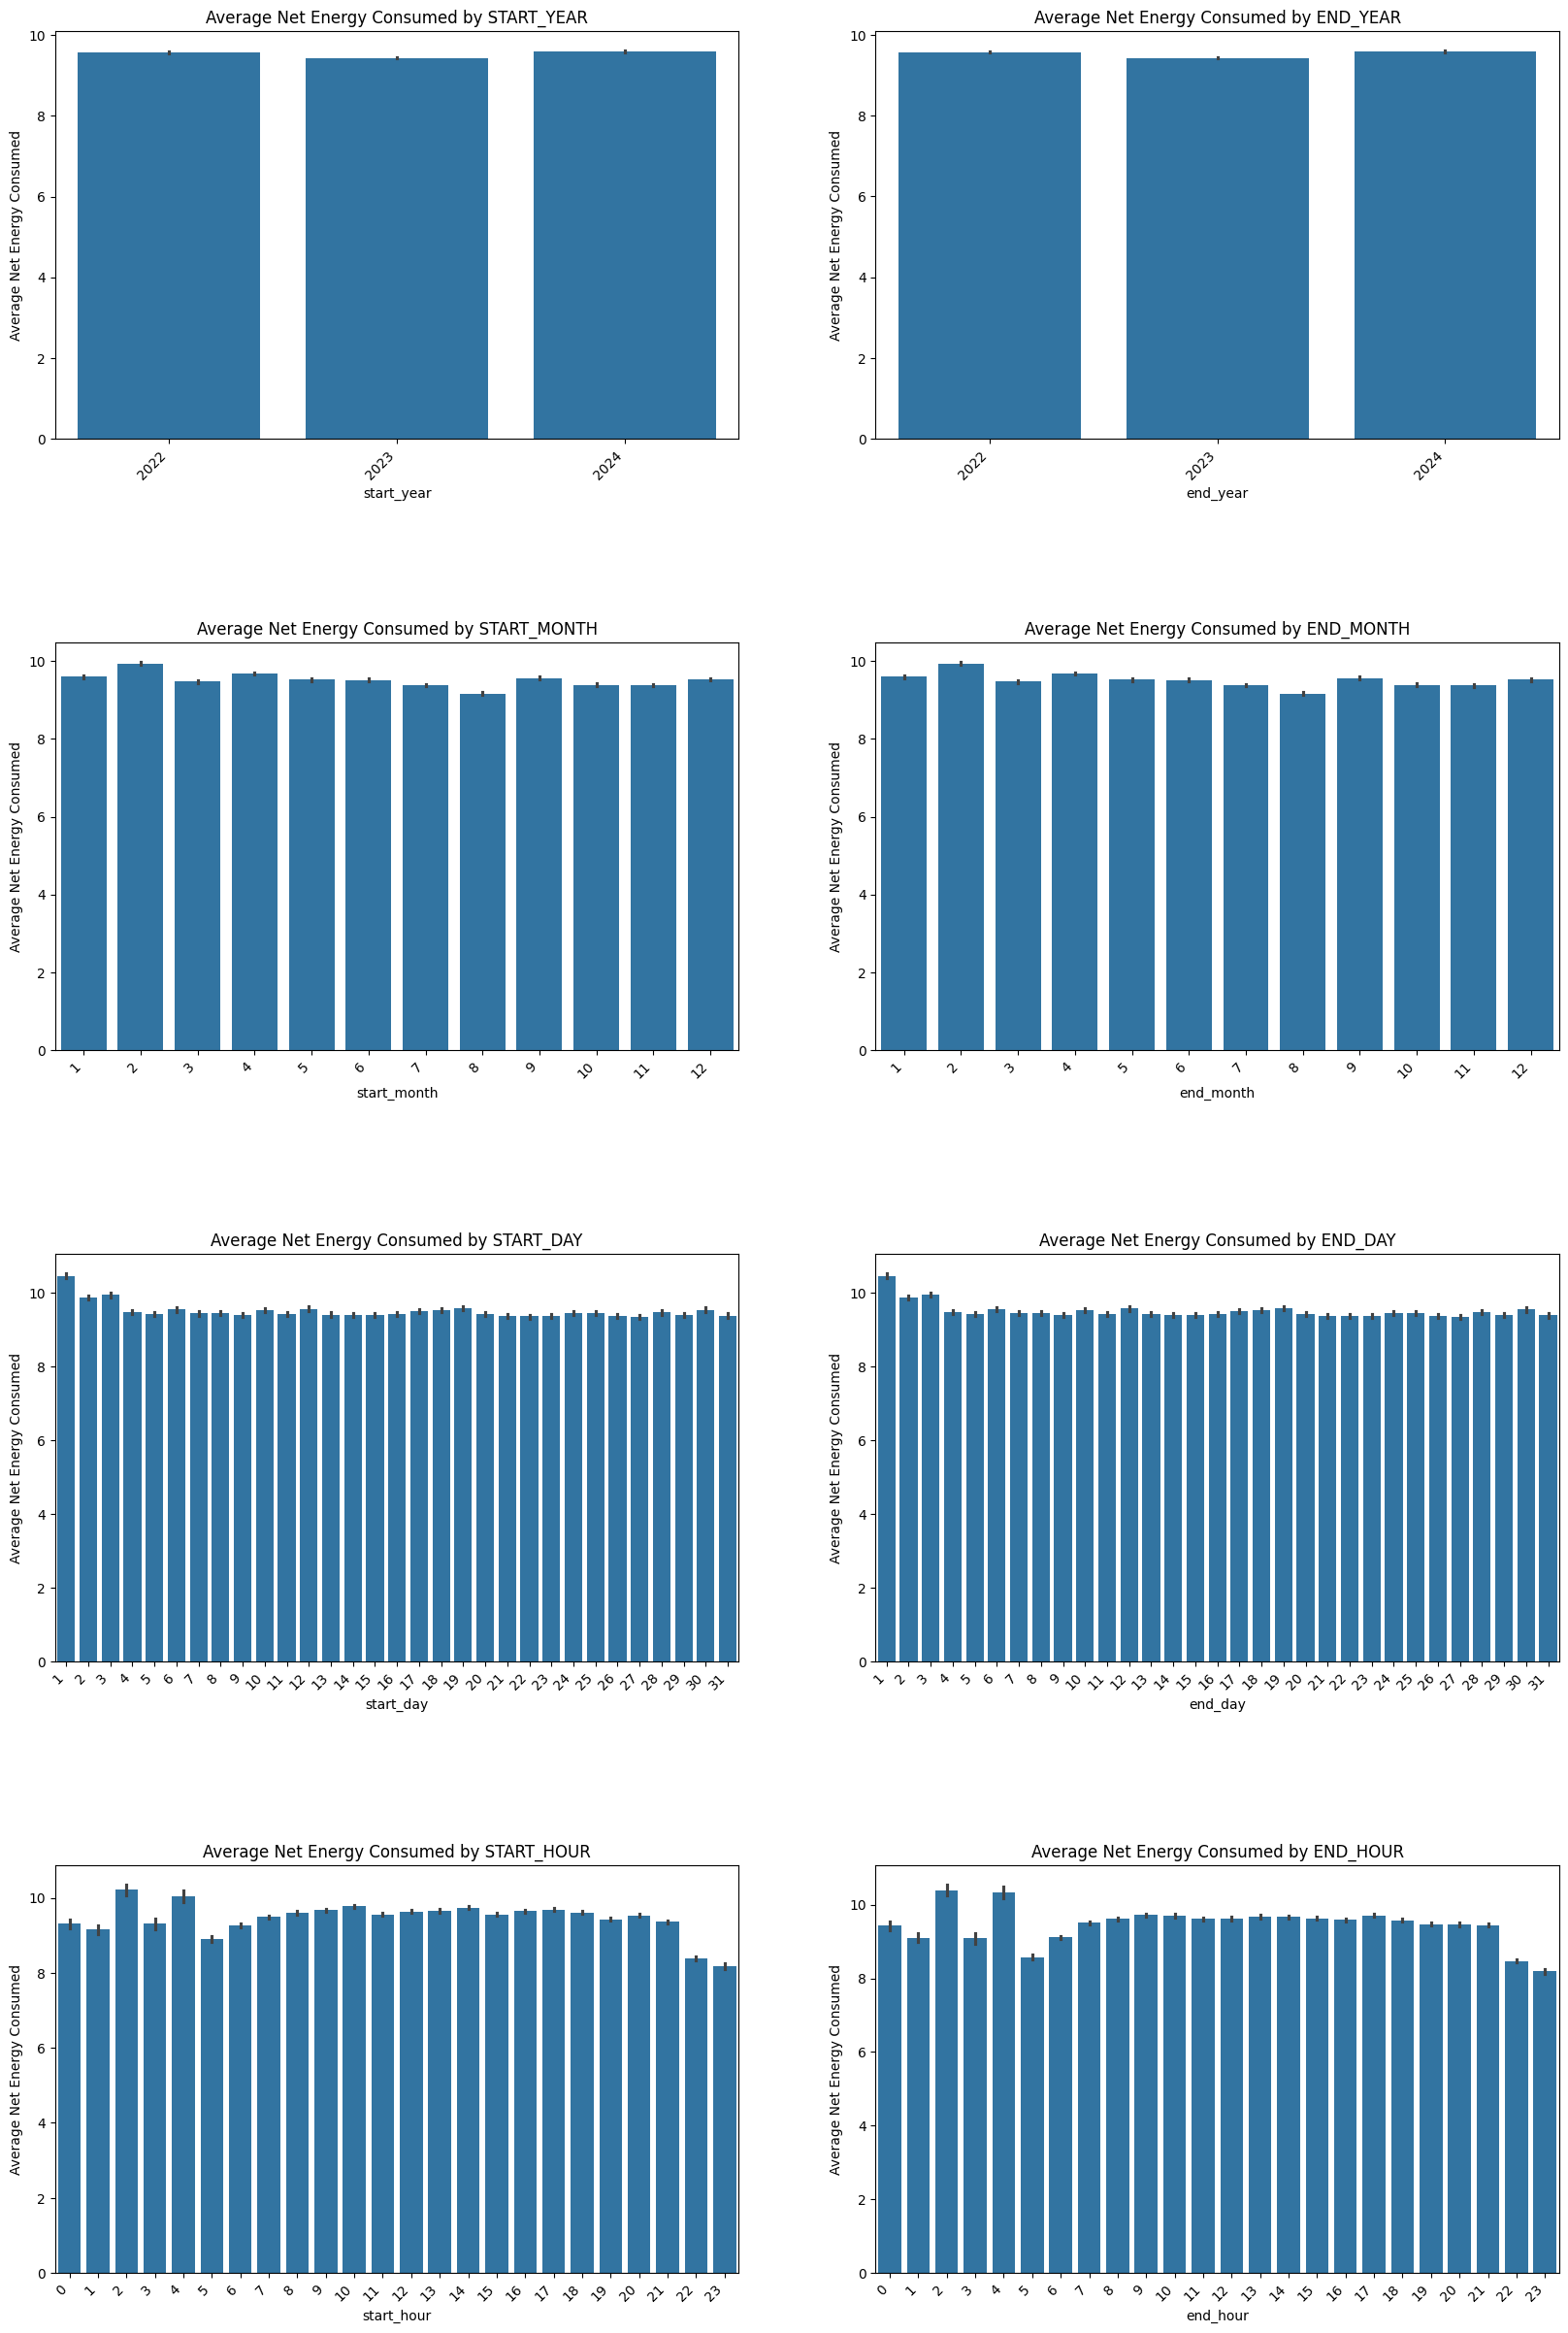

In [26]:
# Creating bar plots for the average net energy consumed by the extracted parts
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)

# Bar plot for start_year
sns.barplot(x='start_year', y='net_energy_consumed_by_UT', data=data, ax=axes[0, 0], estimator='mean')
axes[0, 0].set_title('Average Net Energy Consumed by START_YEAR')
axes[0, 0].set_xlabel('start_year')
axes[0, 0].set_ylabel('Average Net Energy Consumed')

# Bar plot for start_month
sns.barplot(x='start_month', y='net_energy_consumed_by_UT', data=data, ax=axes[1, 0], estimator='mean')
axes[1, 0].set_title('Average Net Energy Consumed by START_MONTH')
axes[1, 0].set_xlabel('start_month')
axes[1, 0].set_ylabel('Average Net Energy Consumed')

# Bar plot for start_day
sns.barplot(x='start_day', y='net_energy_consumed_by_UT', data=data, ax=axes[2, 0], estimator='mean')
axes[2, 0].set_title('Average Net Energy Consumed by START_DAY')
axes[2, 0].set_xlabel('start_day')
axes[2, 0].set_ylabel('Average Net Energy Consumed')

# Bar plot for start_hour
sns.barplot(x='start_hour', y='net_energy_consumed_by_UT', data=data, ax=axes[3, 0], estimator='mean')
axes[3, 0].set_title('Average Net Energy Consumed by START_HOUR')
axes[3, 0].set_xlabel('start_hour')
axes[3, 0].set_ylabel('Average Net Energy Consumed')

# Bar plot for end_year
sns.barplot(x='end_year', y='net_energy_consumed_by_UT', data=data, ax=axes[0, 1], estimator='mean')
axes[0, 1].set_title('Average Net Energy Consumed by END_YEAR')
axes[0, 1].set_xlabel('end_year')
axes[0, 1].set_ylabel('Average Net Energy Consumed')

# Bar plot for end_month
sns.barplot(x='end_month', y='net_energy_consumed_by_UT', data=data, ax=axes[1, 1], estimator='mean')
axes[1, 1].set_title('Average Net Energy Consumed by END_MONTH')
axes[1, 1].set_xlabel('end_month')
axes[1, 1].set_ylabel('Average Net Energy Consumed')

# Bar plot for end_day
sns.barplot(x='end_day', y='net_energy_consumed_by_UT', data=data, ax=axes[2, 1], estimator='mean')
axes[2, 1].set_title('Average Net Energy Consumed by END_DAY')
axes[2, 1].set_xlabel('end_day')
axes[2, 1].set_ylabel('Average Net Energy Consumed')

# Bar plot for end_hour
sns.barplot(x='end_hour', y='net_energy_consumed_by_UT', data=data, ax=axes[3, 1], estimator='mean')
axes[3, 1].set_title('Average Net Energy Consumed by END_HOUR')
axes[3, 1].set_xlabel('end_hour')
axes[3, 1].set_ylabel('Average Net Energy Consumed')

plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 1].get_xticklabels(), rotation=45, ha='right')

plt.show()

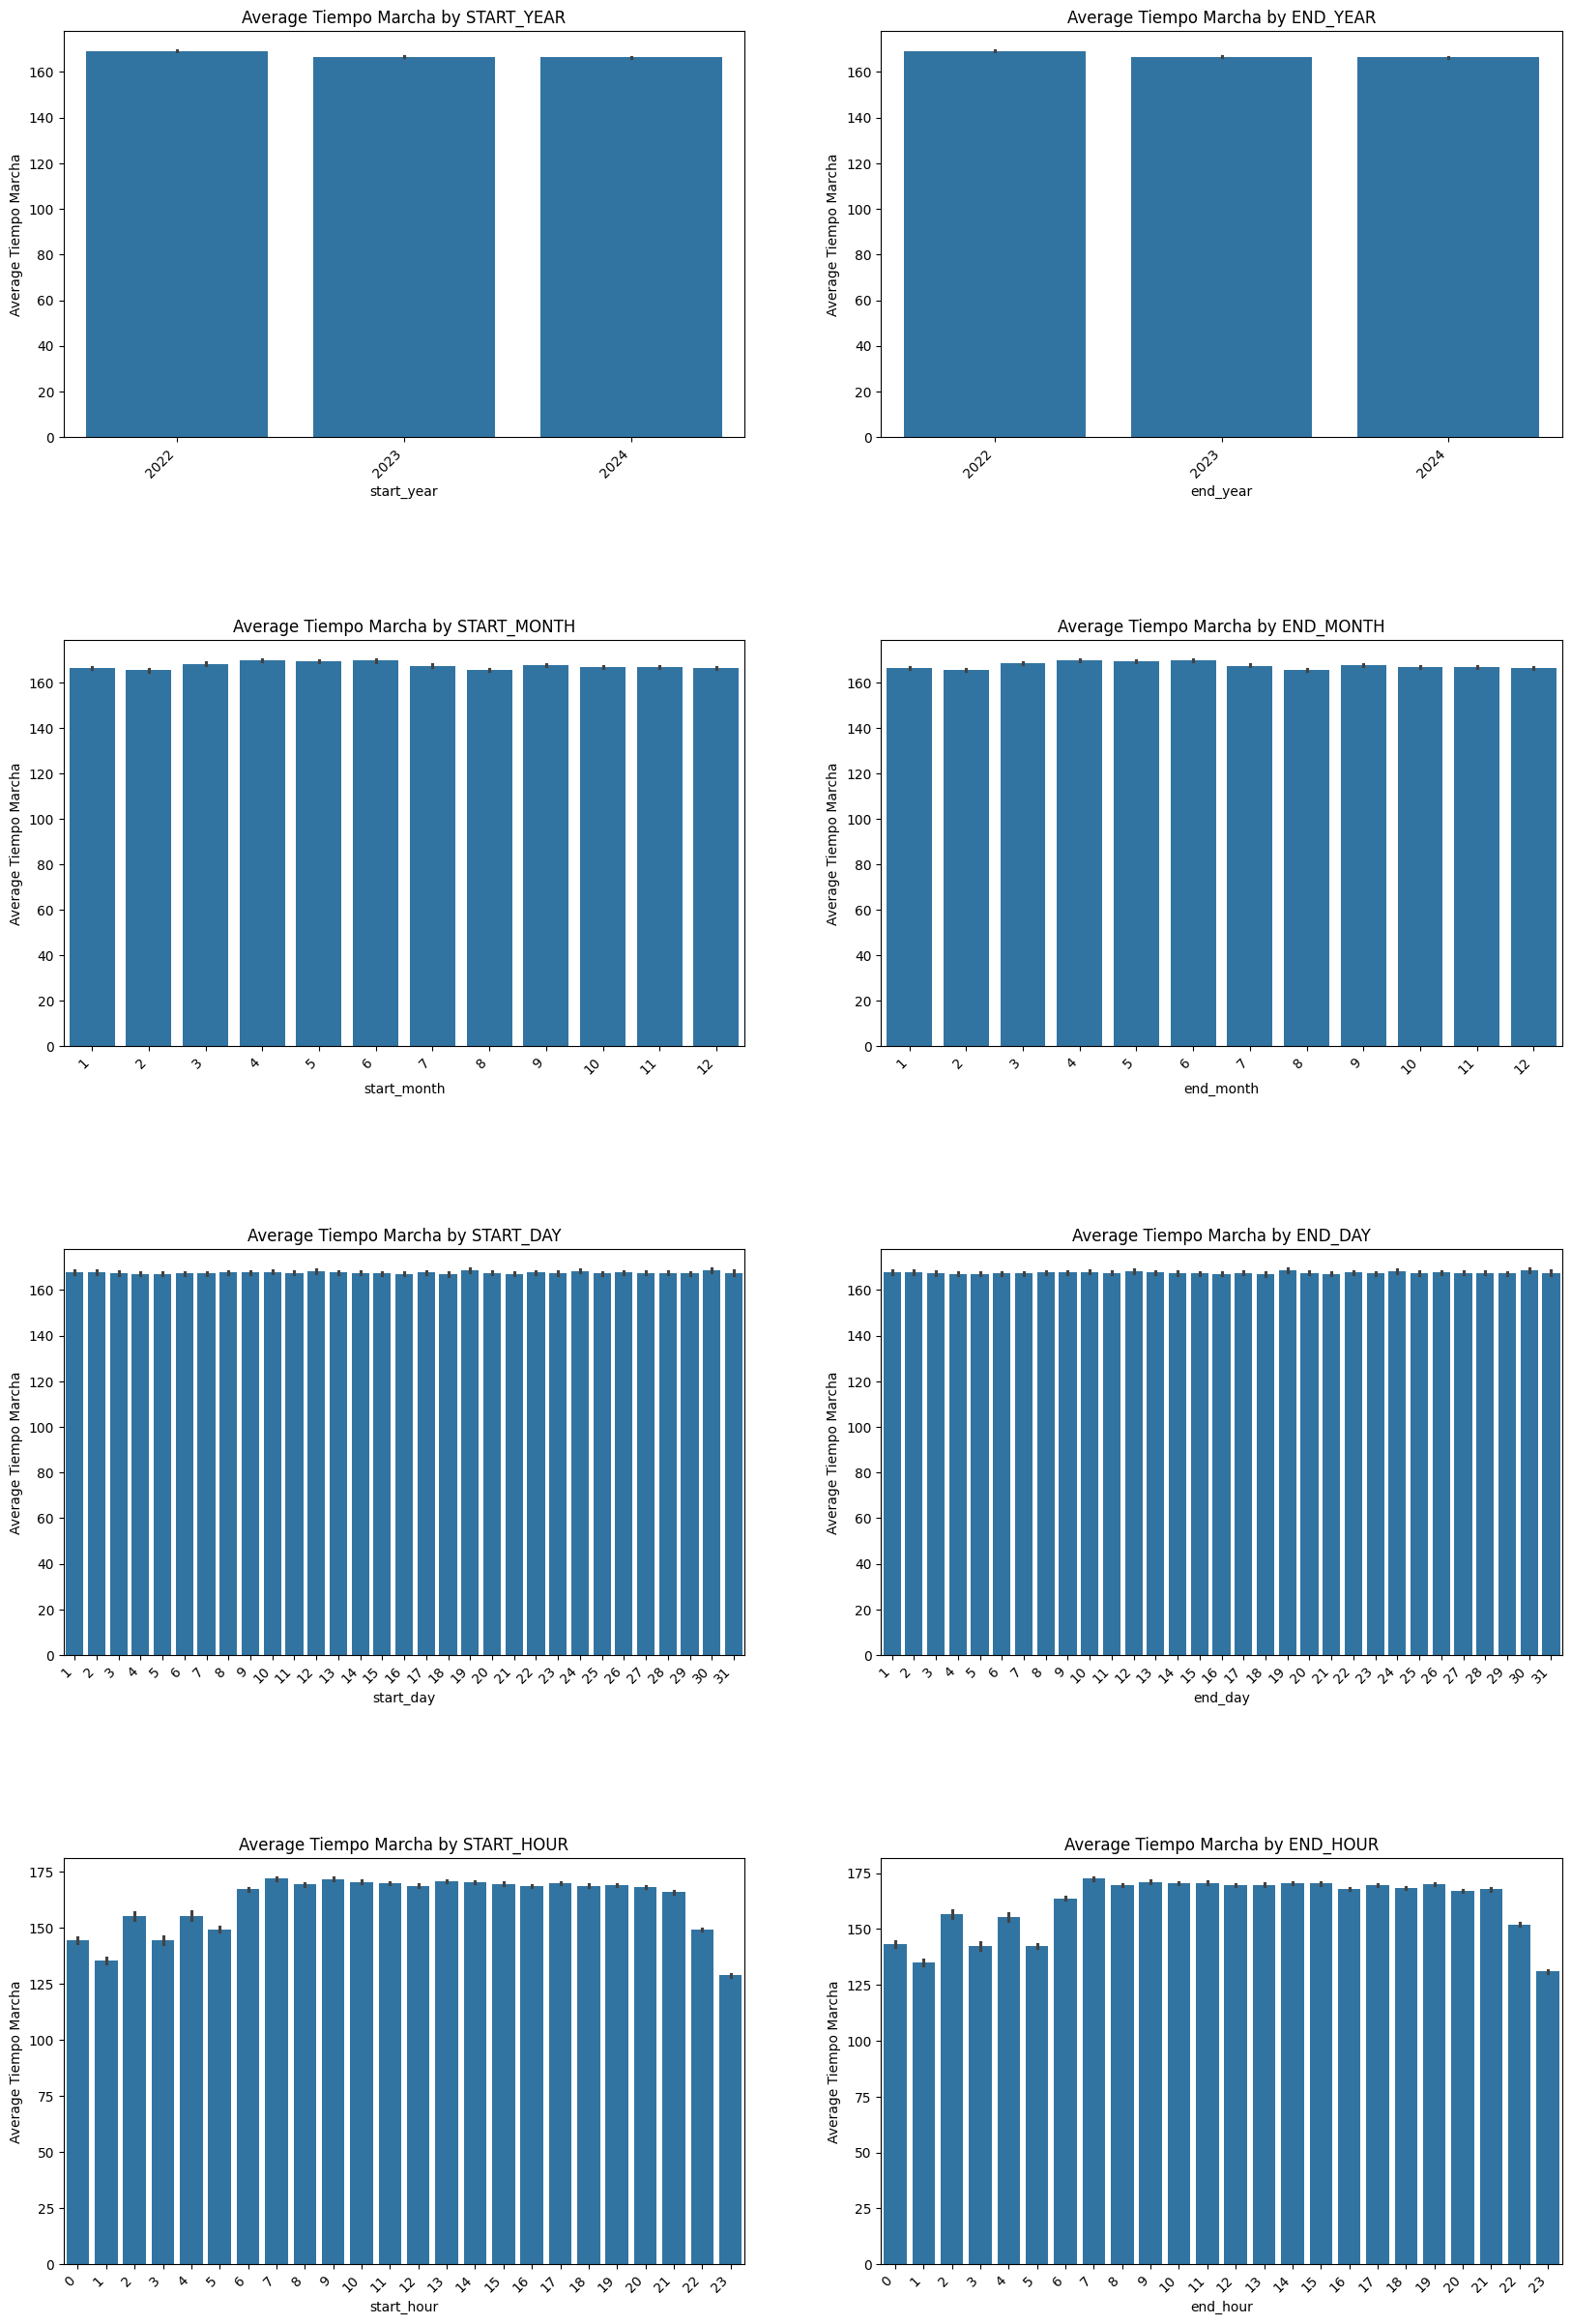

In [27]:
# Creating bar plots for the average tiempo_marcha by the extracted parts
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)

# Bar plot for start_year
sns.barplot(x='start_year', y='tiempo_marcha', data=data, ax=axes[0, 0], estimator='mean')
axes[0, 0].set_title('Average Tiempo Marcha by START_YEAR')
axes[0, 0].set_xlabel('start_year')
axes[0, 0].set_ylabel('Average Tiempo Marcha')

# Bar plot for start_month
sns.barplot(x='start_month', y='tiempo_marcha', data=data, ax=axes[1, 0], estimator='mean')
axes[1, 0].set_title('Average Tiempo Marcha by START_MONTH')
axes[1, 0].set_xlabel('start_month')
axes[1, 0].set_ylabel('Average Tiempo Marcha')

# Bar plot for start_day
sns.barplot(x='start_day', y='tiempo_marcha', data=data, ax=axes[2, 0], estimator='mean')
axes[2, 0].set_title('Average Tiempo Marcha by START_DAY')
axes[2, 0].set_xlabel('start_day')
axes[2, 0].set_ylabel('Average Tiempo Marcha')

# Bar plot for start_hour
sns.barplot(x='start_hour', y='tiempo_marcha', data=data, ax=axes[3, 0], estimator='mean')
axes[3, 0].set_title('Average Tiempo Marcha by START_HOUR')
axes[3, 0].set_xlabel('start_hour')
axes[3, 0].set_ylabel('Average Tiempo Marcha')

# Bar plot for end_year
sns.barplot(x='end_year', y='tiempo_marcha', data=data, ax=axes[0, 1], estimator='mean')
axes[0, 1].set_title('Average Tiempo Marcha by END_YEAR')
axes[0, 1].set_xlabel('end_year')
axes[0, 1].set_ylabel('Average Tiempo Marcha')

# Bar plot for end_month
sns.barplot(x='end_month', y='tiempo_marcha', data=data, ax=axes[1, 1], estimator='mean')
axes[1, 1].set_title('Average Tiempo Marcha by END_MONTH')
axes[1, 1].set_xlabel('end_month')
axes[1, 1].set_ylabel('Average Tiempo Marcha')

# Bar plot for end_day
sns.barplot(x='end_day', y='tiempo_marcha', data=data, ax=axes[2, 1], estimator='mean')
axes[2, 1].set_title('Average Tiempo Marcha by END_DAY')
axes[2, 1].set_xlabel('end_day')
axes[2, 1].set_ylabel('Average Tiempo Marcha')

# Bar plot for end_hour
sns.barplot(x='end_hour', y='tiempo_marcha', data=data, ax=axes[3, 1], estimator='mean')
axes[3, 1].set_title('Average Tiempo Marcha by END_HOUR')
axes[3, 1].set_xlabel('end_hour')
axes[3, 1].set_ylabel('Average Tiempo Marcha')

plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 1].get_xticklabels(), rotation=45, ha='right')

plt.show()

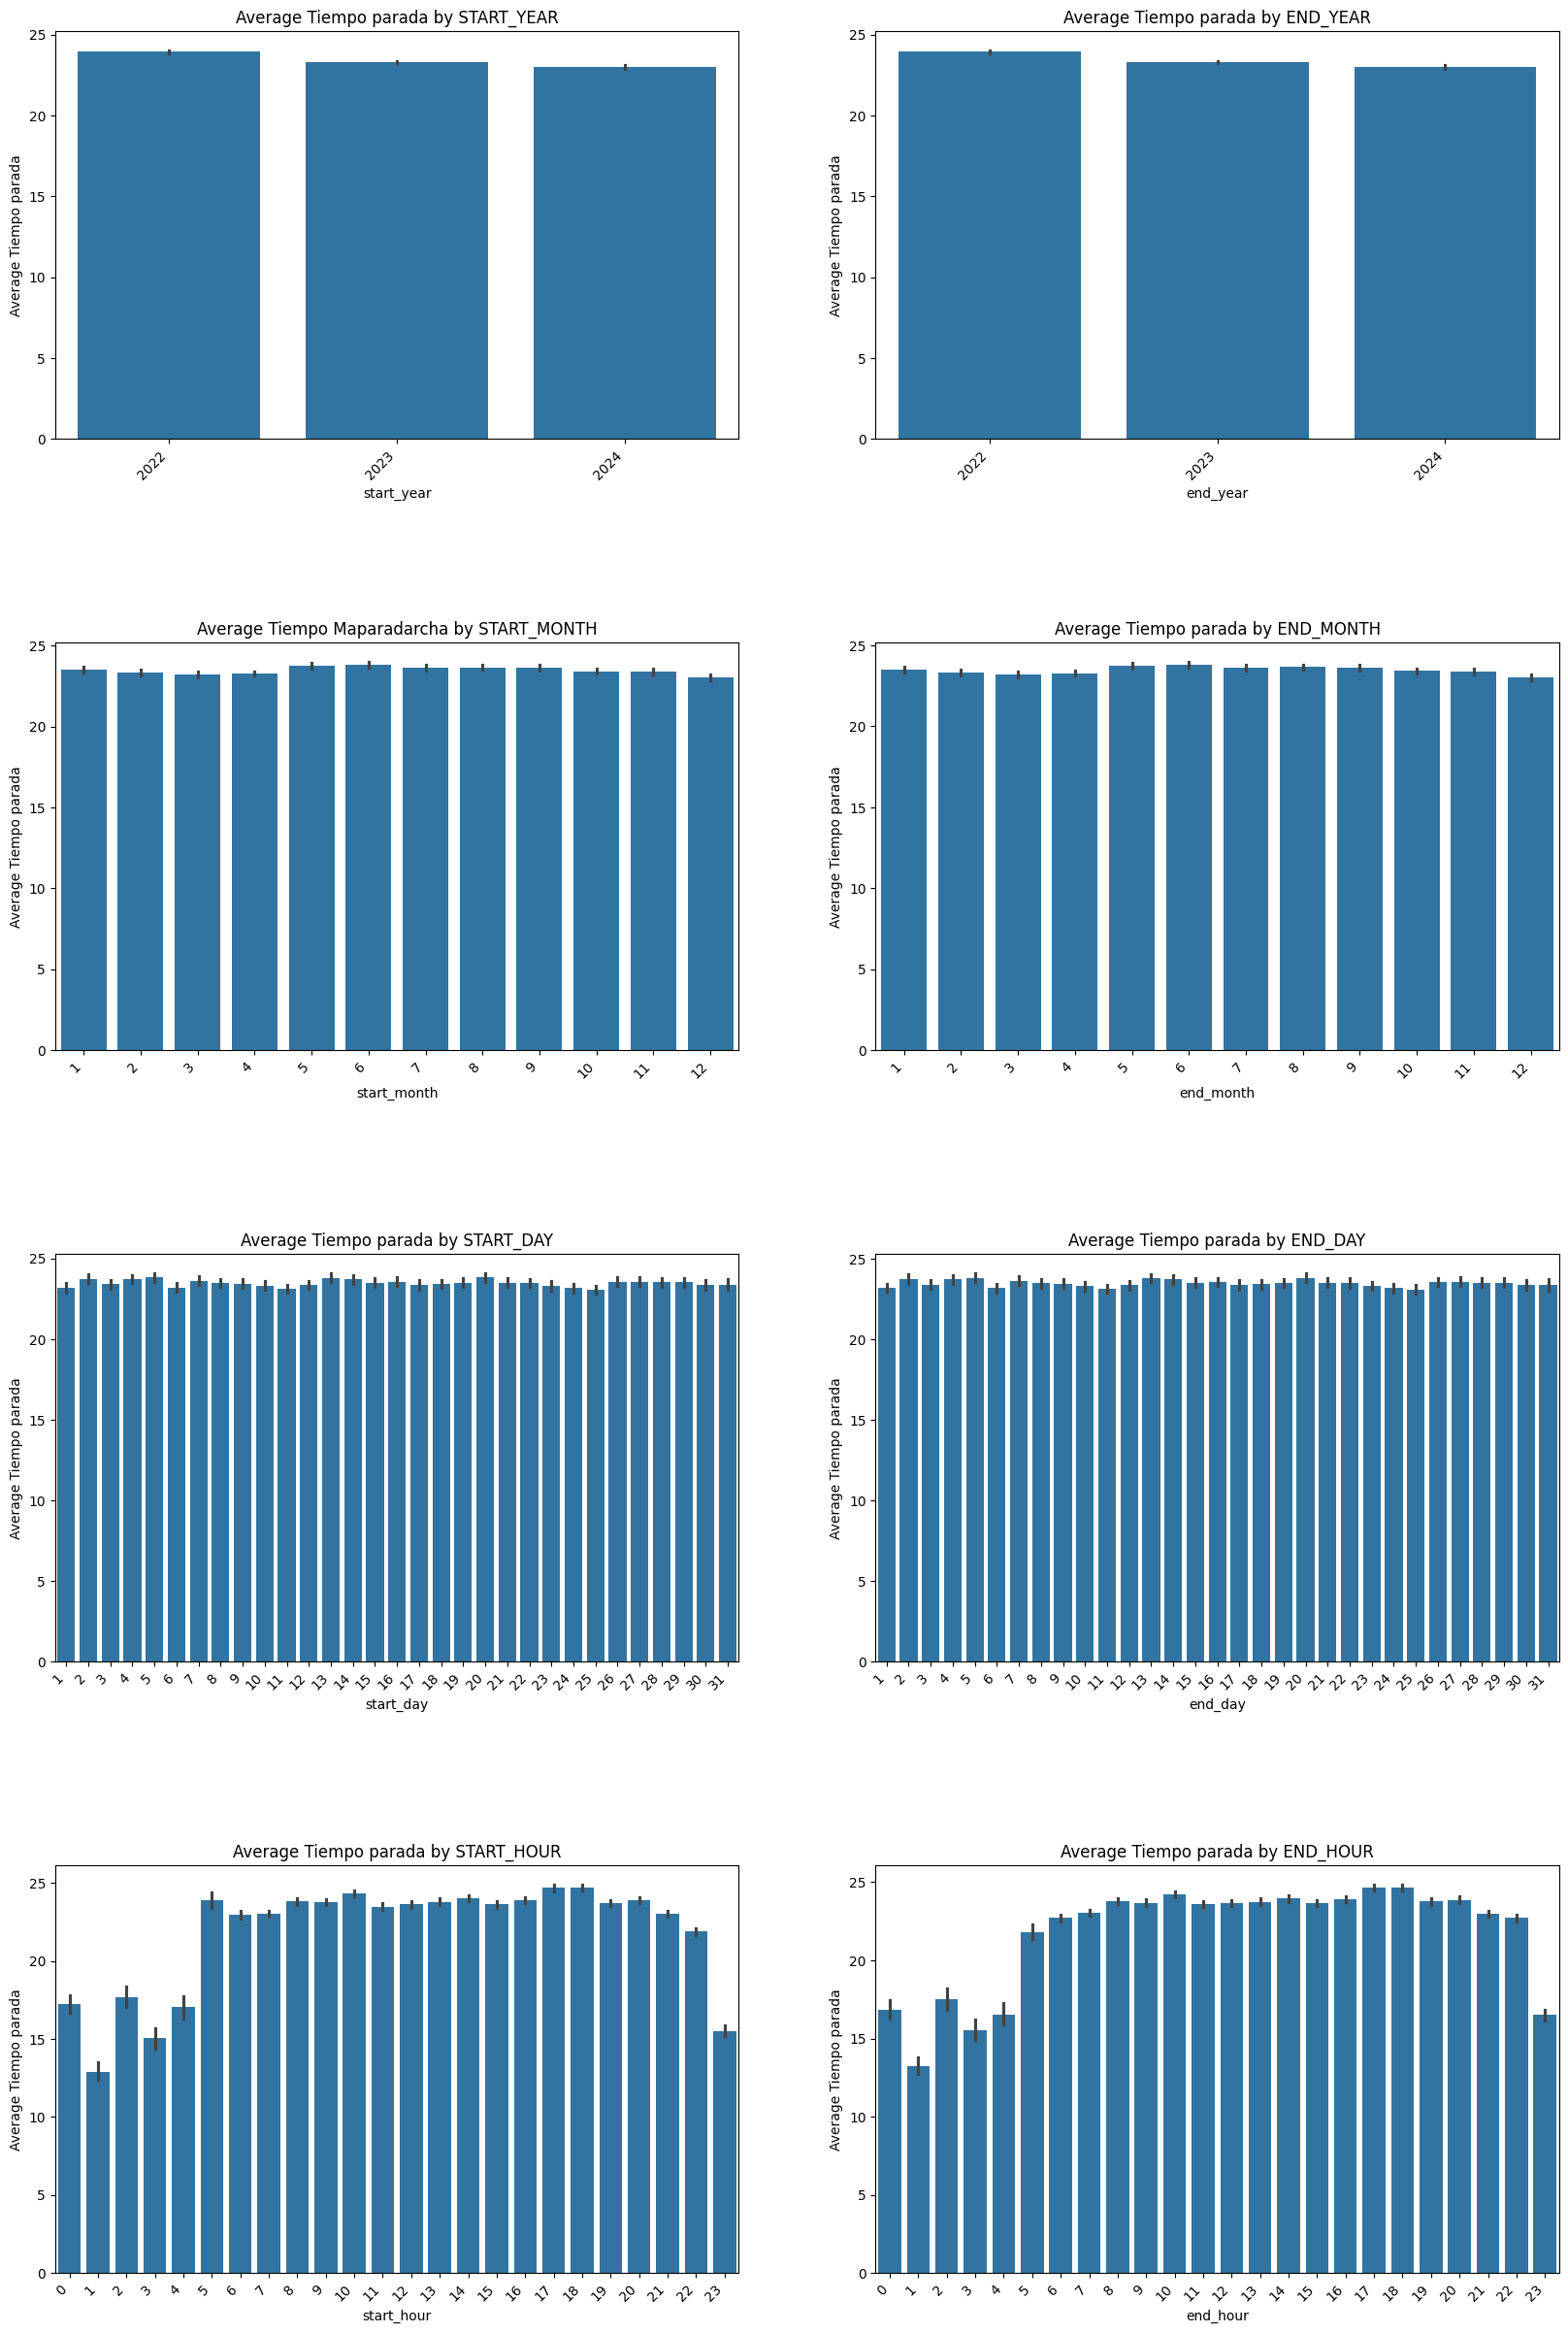

In [28]:
# Creating bar plots for the average tiempo_parada by the extracted parts
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)

# Bar plot for start_year
sns.barplot(x='start_year', y='tiempo_parada', data=data, ax=axes[0, 0], estimator='mean')
axes[0, 0].set_title('Average Tiempo parada by START_YEAR')
axes[0, 0].set_xlabel('start_year')
axes[0, 0].set_ylabel('Average Tiempo parada')

# Bar plot for start_month
sns.barplot(x='start_month', y='tiempo_parada', data=data, ax=axes[1, 0], estimator='mean')
axes[1, 0].set_title('Average Tiempo Maparadarcha by START_MONTH')
axes[1, 0].set_xlabel('start_month')
axes[1, 0].set_ylabel('Average Tiempo parada')

# Bar plot for start_day
sns.barplot(x='start_day', y='tiempo_parada', data=data, ax=axes[2, 0], estimator='mean')
axes[2, 0].set_title('Average Tiempo parada by START_DAY')
axes[2, 0].set_xlabel('start_day')
axes[2, 0].set_ylabel('Average Tiempo parada')

# Bar plot for start_hour
sns.barplot(x='start_hour', y='tiempo_parada', data=data, ax=axes[3, 0], estimator='mean')
axes[3, 0].set_title('Average Tiempo parada by START_HOUR')
axes[3, 0].set_xlabel('start_hour')
axes[3, 0].set_ylabel('Average Tiempo parada')

# Bar plot for end_year
sns.barplot(x='end_year', y='tiempo_parada', data=data, ax=axes[0, 1], estimator='mean')
axes[0, 1].set_title('Average Tiempo parada by END_YEAR')
axes[0, 1].set_xlabel('end_year')
axes[0, 1].set_ylabel('Average Tiempo parada')

# Bar plot for end_month
sns.barplot(x='end_month', y='tiempo_parada', data=data, ax=axes[1, 1], estimator='mean')
axes[1, 1].set_title('Average Tiempo parada by END_MONTH')
axes[1, 1].set_xlabel('end_month')
axes[1, 1].set_ylabel('Average Tiempo parada')

# Bar plot for end_day
sns.barplot(x='end_day', y='tiempo_parada', data=data, ax=axes[2, 1], estimator='mean')
axes[2, 1].set_title('Average Tiempo parada by END_DAY')
axes[2, 1].set_xlabel('end_day')
axes[2, 1].set_ylabel('Average Tiempo parada')

# Bar plot for end_hour
sns.barplot(x='end_hour', y='tiempo_parada', data=data, ax=axes[3, 1], estimator='mean')
axes[3, 1].set_title('Average Tiempo parada by END_HOUR')
axes[3, 1].set_xlabel('end_hour')
axes[3, 1].set_ylabel('Average Tiempo parada')

plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[3, 1].get_xticklabels(), rotation=45, ha='right')

plt.show()

### Missing data

In [29]:
# Calculate the percentage of missing values for each column
missing_values_percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

# Filter to show only columns with missing values
missing_values_percent = missing_values_percent[missing_values_percent > 0]

# Display the missing values as a percentage
print(missing_values_percent)

kilometres                  0.897234
tiempo_marcha               0.040763
tiempo_parada               0.040763
avg_voltage                 0.011226
rheostatic_energy           0.005155
rheostatic_energy_weight    0.005155
dtype: float64


### Odd data

In [30]:
data[(data['current_station'] == 'Durango') & (data['next_station'] == 'Kukullaga')]\
    [['current_station', 'next_station', 'kilometres']]\
        .sort_values('kilometres').dropna()

,current_station,next_station,kilometres
1917413,Durango,Kukullaga,0.01
844899,Durango,Kukullaga,0.01
1526426,Durango,Kukullaga,0.01
1654475,Durango,Kukullaga,0.01
624888,Durango,Kukullaga,0.01
...,...,...,...
1109323,Durango,Kukullaga,7.15
136459,Durango,Kukullaga,7.16
102803,Durango,Kukullaga,7.16
1137385,Durango,Kukullaga,7.16


In [31]:
data[(data['current_station'] == 'Amorebieta Geralekua') & (data['next_station'] == 'Kukullaga')]\
    [['current_station', 'next_station', 'kilometres']]\
        .sort_values('kilometres').dropna()

,current_station,next_station,kilometres
710283,Amorebieta Geralekua,Kukullaga,0.01
1613721,Amorebieta Geralekua,Kukullaga,0.02


In [32]:
traject = pd.read_csv('data/final_locations.csv')
traject[['latitude', 'longitude']] = traject['Coordinates'].str.split(',', expand=True).astype(float)

plot_data = traject[['client_line', 'current_station', 'latitude', 'longitude']]

filtered_df = plot_data[plot_data['current_station'].isin(['Amorebieta Geralekua', 'Kukullaga', 'Durango'])]

In [33]:
avg_lat = filtered_df['latitude'].mean()
avg_lon = filtered_df['longitude'].mean()

# Create a Folium map centered on the average latitude and longitude
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Add markers to the map
for _, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['client_line']} - {row['current_station']}",
    ).add_to(m)

# Save the map to an HTML file
m.save('map.html')

m

From the map, we can see that there is no way that the distance between Amorebieta Geralekua and Kukullaga or between etween Durango and Kukullaga is only 0.01 or 0.02, so we will fix this.

### Outliers

In [34]:
# Checking for outliers using IQR

df = data.select_dtypes(exclude=['object'])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Calculate the values more or less than 1.5 times the IQR for each column
values_more_less_than_1_5_iqr = {}
for column in df.columns:
    lower_bound = q1[column] - 1.5 * iqr[column]
    upper_bound = q3[column] + 1.5 * iqr[column]
    values_more_less_than_1_5_iqr[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

# Store the results in another DataFrame
result_df = pd.DataFrame(values_more_less_than_1_5_iqr, index=['Number of Values'])

print("Number of values more or less than 1.5 times the IQR for each column:")
result_df

Number of values more or less than 1.5 times the IQR for each column:


,start_date,end_date,tiempo_marcha,tiempo_parada,avg_voltage,kilometres,net_energy_consumed_by_UT,auxiliary_energy_consumed,traction_energy,rheostatic_energy,regenerated_traction_energy,catenary_regenerated_energy,regenerated_energy_to_auxiliaries,net_energy_consumed_by_UT_weight,auxiliary_energy_consumed_weight,traction_energy_weight,rheostatic_energy_weight,regenerated_traction_energy_weight,catenary_regenerated_energy_weight,regenerated_energy_to_auxiliaries_weight,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour
Number of Values,0,0,403331,413498,42210,368745,153289,276152,164123,120227,96016,85113,207873,155079,276727,166982,119883,95598,85022,209299,0,0,0,0,0,0,0,0


### Map visualization

In [35]:
m = folium.Map(location=[43.272488, -2.363647], zoom_start=10
)

# Define a dictionary to map client lines to colors
color_dict = {
    'Bilbao-Donostia': 'blue',
    'Ramal Amorebieta-Bermeo': 'green',
    'Ramal Lasarte': 'red', 
    'Donostia-Hendaia': 'pink',
    'L3 Txori': 'black',
    'Lutxana-Sondika': 'gray',
    'Ramal Altza': 'orange'
    # Add other client lines and their corresponding colors here
}

# Function to choose marker color based on client_line
def get_marker_color(client_line):
    return color_dict.get(client_line)  # Default color is gray

# Add markers to the map
for idx, row in plot_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['current_station'],
        icon=folium.Icon(color=get_marker_color(row['client_line']))
    ).add_to(m)

# Create a legend as a separate HTML string
legend_html = '''
     <div style="position: fixed; 
                 bottom: 30px; left: 30px; width: 150px; height: 170px; 
                 border:2px solid grey; z-index:9999; font-size:10px;
                 background-color:white;
                 ">
     &nbsp;<b> Client Line Legend </b><br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:blue"></i>&nbsp; Bilbao-Donostia<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:green"></i>&nbsp; Ramal Amorebieta-Bermeo<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:red"></i>&nbsp; Ramal Lasarte<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:pink"></i>&nbsp; Donostia-Hendaia<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:black"></i>&nbsp; L3 Txori<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:gray"></i>&nbsp; Lutxana-Sondika<br>
     &nbsp;<i class="fa fa-map-marker fa-2x" style="color:orange"></i>&nbsp; Ramal Altza<br>
     </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('map.html')

# Display the map in a Jupyter Notebook (optional)
m